In [1]:
# ============================================================================
# CELL 1: PROJECT INTRODUCTION
# ============================================================================

# 📚 Amazon Top 50 Books Analysis: A Decade of Bestsellers (2009-2019)

## Project Overview
This project analyzes the **TOP 50 BESTSELLING BOOKS from Amazon each year** spanning 2009-2019 to uncover patterns in ratings, pricing, and reader engagement among the most successful books.

⚠️ **IMPORTANT NOTE:** This dataset represents the TOP 50 books from each year (550 total books). These are bestsellers and highly-rated books, NOT a random sample of all books. Findings reflect trends among the most successful books only.

## Dataset Information
- **Records:** 550 books (Top 50 from each year)
- **Time Period:** 2009-2019 (11 years)
- **Selection Criteria:** Top 50 bestselling/most popular books per year
- **Features:** Name, Author, User Rating, Reviews, Price, Year, Genre
- **Genres:** Fiction and Non-Fiction only

## Research Questions
1. What factors distinguish the most successful books?
2. How have bestseller characteristics changed over time?
3. Do Fiction or Non-Fiction books perform better as bestsellers?
4. Is there a relationship between price and success among bestsellers?
5. Do bestsellers with more reviews have higher ratings?
6. How do top books differ across price points?

## Important Limitations
- **Sample Bias:** This analysis only includes bestsellers, not average or poorly-performing books
- **High Rating Floor:** Expect ratings to be high (bestsellers are usually well-rated)
- **Success Factors:** These books have already "proven" themselves in the market
- **Limited Genre Classification:** Only Fiction vs Non-Fiction (no sub-genres)

## Tools & Libraries
- **Python 3.x**
- **Pandas** - Data manipulation
- **Matplotlib & Seaborn** - Visualization
- **Scikit-learn** - Predictive modeling
- **NumPy** - Numerical operations

In [2]:
# ============================================================================
# CELL 2: IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plot style
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
# ============================================================================
# CELL 3: LOAD DATA
# ============================================================================

# Load the dataset
df = pd.read_csv(r"C:\Users\maryr\Downloads\PORTFOLIO\bestsellers with categories.csv")

print("✅ Data loaded successfully!")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

✅ Data loaded successfully!
Dataset shape: 550 rows × 7 columns


In [5]:
# ============================================================================
# CELL 4: INSPECT DATAFRAME
# ============================================================================

print("="*80)
print("DATASET OVERVIEW: TOP 50 BOOKS PER YEAR (2009-2019)")
print("="*80)
print(f"Total records: {len(df)}")
print(f"Expected records: 50 books × 11 years = 550 books")
print(f"Date range: {df['Year'].min()} - {df['Year'].max()}")

# Check if we have exactly 50 books per year
print("\n📊 Books per year:")
books_per_year = df['Year'].value_counts().sort_index()
print(books_per_year)

if (books_per_year == 50).all():
    print("\n✅ Confirmed: Exactly 50 books per year (Top 50 bestsellers)")
else:
    print("\n⚠️ Note: Some years have different counts")

print("\n" + "="*80)
print("COLUMN NAMES AND DATA TYPES")
print("="*80)
print(df.info())

print("\n" + "="*80)
print("FIRST 10 ROWS OF DATA")
print("="*80)
print(df.head(10))

print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)
print(df.describe())

print("\n" + "="*80)
print("MISSING VALUES CHECK")
print("="*80)
print(df.isnull().sum())

print("\n" + "="*80)
print("GENRE DISTRIBUTION")
print(df['Genre'].value_counts())

DATASET OVERVIEW: TOP 50 BOOKS PER YEAR (2009-2019)
Total records: 550
Expected records: 50 books × 11 years = 550 books
Date range: 2009 - 2019

📊 Books per year:
Year
2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
Name: count, dtype: int64

✅ Confirmed: Exactly 50 books per year (Top 50 bestsellers)

COLUMN NAMES AND DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None

FIRST 10 ROWS OF DATA
                     

In [ ]:
---
# 📊 EXPLORATORY DATA ANALYSIS
---

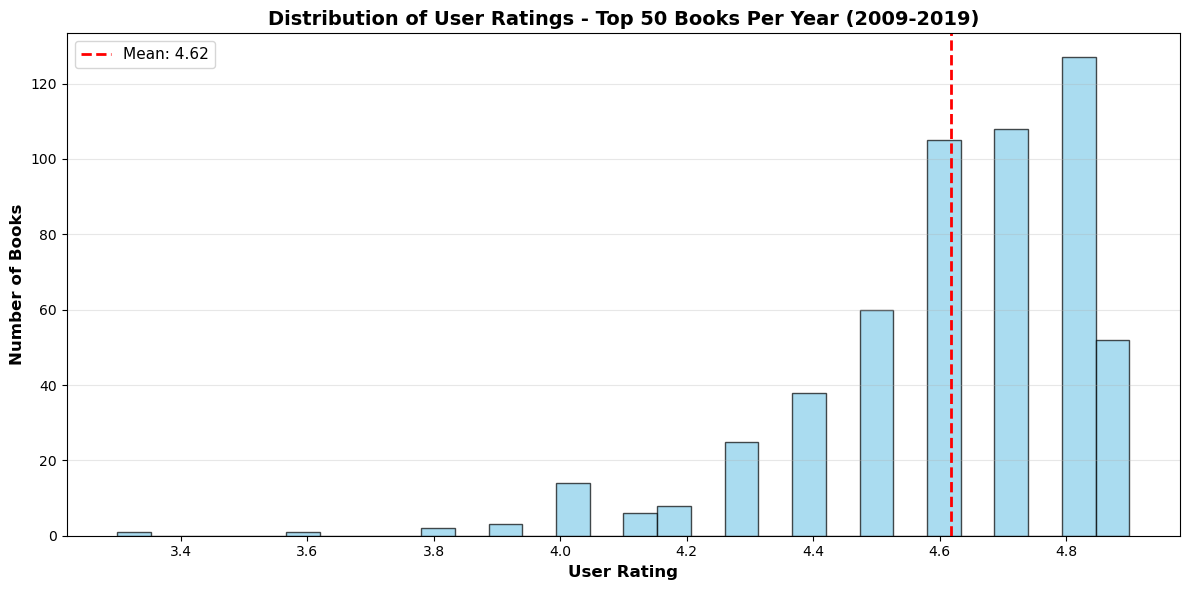

RATING DISTRIBUTION ANALYSIS
Average Rating: 4.62
Median Rating: 4.70
Rating Range: 3.30 - 4.90
Standard Deviation: 0.23

⚠️ IMPORTANT CONTEXT:
These ratings are HIGH because this dataset only includes
the TOP 50 bestselling books each year. Bestsellers typically
have higher ratings than average books.


In [6]:
# ============================================================================
# CELL 5: RATING DISTRIBUTION
# ============================================================================

plt.figure(figsize=(12, 6))
plt.hist(df['User Rating'], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
plt.xlabel('User Rating', fontsize=12, fontweight='bold')
plt.ylabel('Number of Books', fontsize=12, fontweight='bold')
plt.title('Distribution of User Ratings - Top 50 Books Per Year (2009-2019)', 
          fontsize=14, fontweight='bold')
plt.axvline(df['User Rating'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {df["User Rating"].mean():.2f}')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("RATING DISTRIBUTION ANALYSIS")
print("="*70)
print(f"Average Rating: {df['User Rating'].mean():.2f}")
print(f"Median Rating: {df['User Rating'].median():.2f}")
print(f"Rating Range: {df['User Rating'].min():.2f} - {df['User Rating'].max():.2f}")
print(f"Standard Deviation: {df['User Rating'].std():.2f}")

print("\n⚠️ IMPORTANT CONTEXT:")
print("These ratings are HIGH because this dataset only includes")
print("the TOP 50 bestselling books each year. Bestsellers typically")
print("have higher ratings than average books.")
print("="*70)

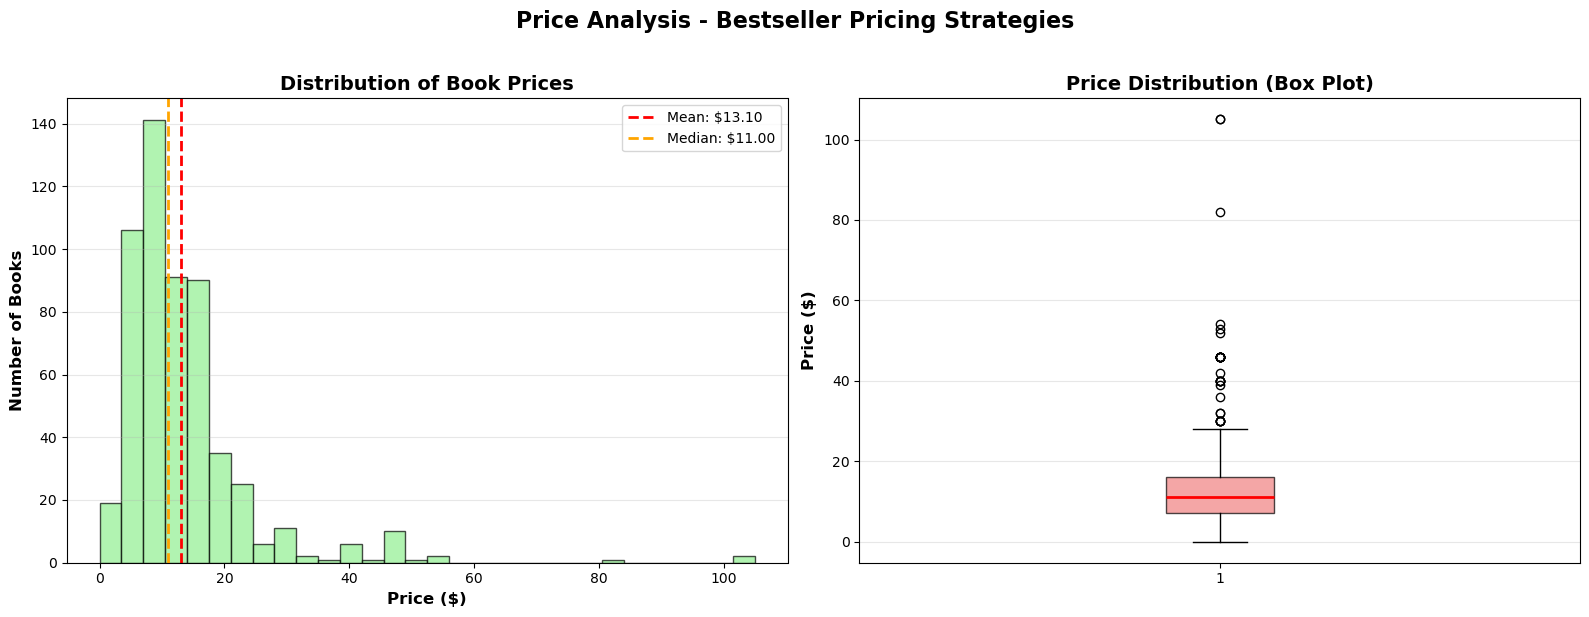

PRICE ANALYSIS
Average Price: $13.10
Median Price: $11.00
Price Range: $0.00 - $105.00
Standard Deviation: $10.84

Free books: 12 (2.2%)
Premium books (>$20): 68 (12.4%)

💡 CONTEXT:
These are bestseller prices. Pricing strategies may differ from typical books.


In [7]:
# ============================================================================
# CELL 6: PRICE ANALYSIS
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(df['Price'], bins=30, edgecolor='black', color='lightgreen', alpha=0.7)
axes[0].axvline(df['Price'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: ${df["Price"].mean():.2f}')
axes[0].axvline(df['Price'].median(), color='orange', linestyle='--', 
                linewidth=2, label=f'Median: ${df["Price"].median():.2f}')
axes[0].set_xlabel('Price ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Books', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Book Prices', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df['Price'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Price ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Price Distribution (Box Plot)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('Price Analysis - Bestseller Pricing Strategies', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("PRICE ANALYSIS")
print("="*70)
print(f"Average Price: ${df['Price'].mean():.2f}")
print(f"Median Price: ${df['Price'].median():.2f}")
print(f"Price Range: ${df['Price'].min():.2f} - ${df['Price'].max():.2f}")
print(f"Standard Deviation: ${df['Price'].std():.2f}")

free_books = (df['Price'] == 0).sum()
premium_books = (df['Price'] > 20).sum()
print(f"\nFree books: {free_books} ({free_books/len(df)*100:.1f}%)")
print(f"Premium books (>$20): {premium_books} ({premium_books/len(df)*100:.1f}%)")

print("\n💡 CONTEXT:")
print("These are bestseller prices. Pricing strategies may differ from typical books.")
print("="*70)

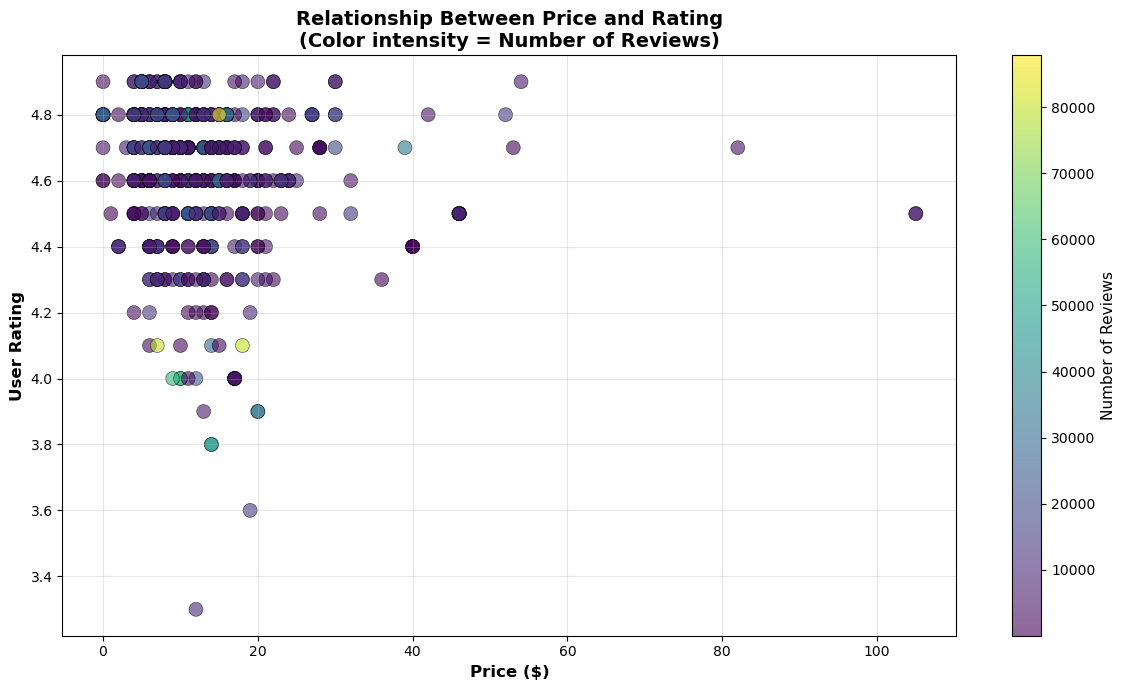

PRICE VS RATING CORRELATION
Correlation coefficient: -0.133
Interpretation: Weak negative correlation

💡 INSIGHT:
Price and rating are weakly correlated among bestsellers,
suggesting that expensive books aren't necessarily better rated.


In [8]:
# ============================================================================
# CELL 7: RELATIONSHIP BETWEEN PRICE AND RATING
# ============================================================================

plt.figure(figsize=(12, 7))
plt.scatter(df['Price'], df['User Rating'], alpha=0.6, s=100, 
            c=df['Reviews'], cmap='viridis', edgecolors='black', linewidth=0.5)
plt.xlabel('Price ($)', fontsize=12, fontweight='bold')
plt.ylabel('User Rating', fontsize=12, fontweight='bold')
plt.title('Relationship Between Price and Rating\n(Color intensity = Number of Reviews)', 
          fontsize=14, fontweight='bold')
cbar = plt.colorbar()
cbar.set_label('Number of Reviews', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['Price'].corr(df['User Rating'])
print("PRICE VS RATING CORRELATION")
print("="*70)
print(f"Correlation coefficient: {correlation:.3f}")

if abs(correlation) < 0.3:
    strength = "weak"
elif abs(correlation) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if correlation > 0 else "negative"

print(f"Interpretation: {strength.capitalize()} {direction} correlation")
print("\n💡 INSIGHT:")
if abs(correlation) < 0.3:
    print("Price and rating are weakly correlated among bestsellers,")
    print("suggesting that expensive books aren't necessarily better rated.")
else:
    print(f"Price shows a {strength} {direction} relationship with ratings.")
print("="*70)

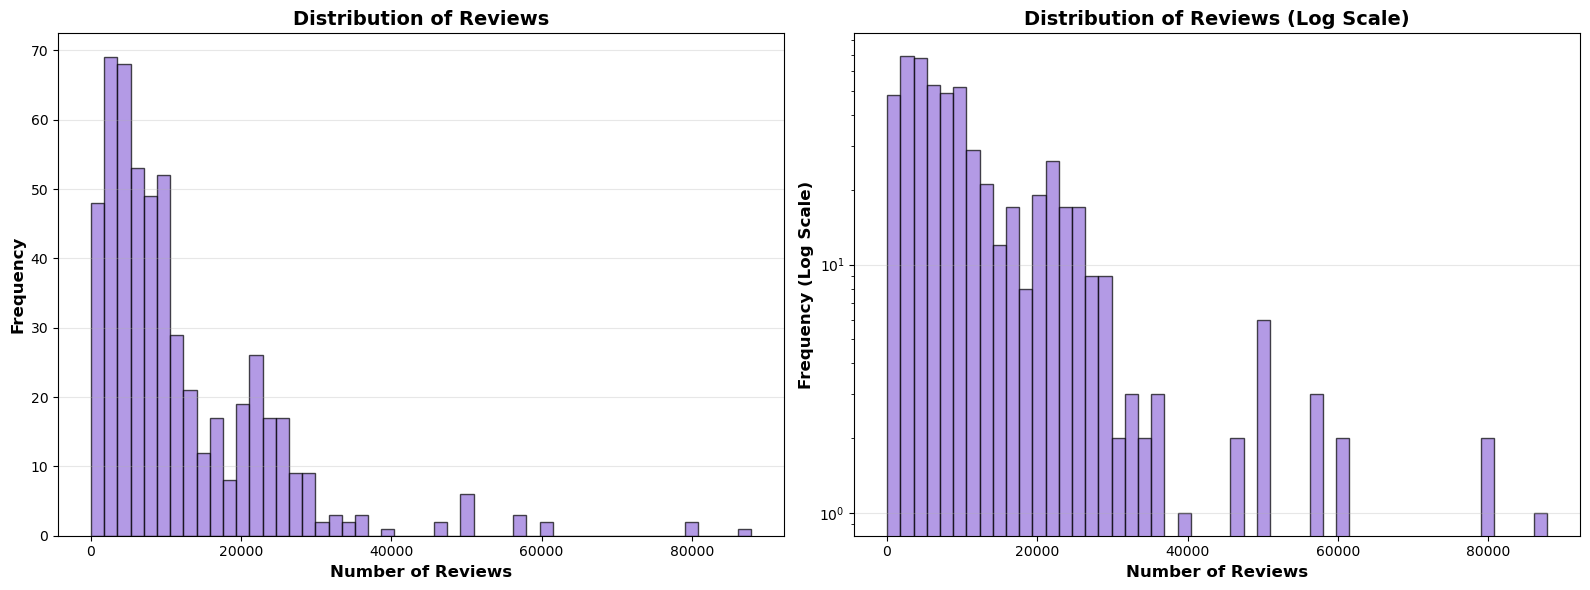

REVIEWS ANALYSIS
Average Reviews: 11953
Median Reviews: 8580
Review Range: 37 - 87,841
Standard Deviation: 11731

Top 5 Most Reviewed Books:
                   Name         Author  Reviews  User Rating  Year
Where the Crawdads Sing    Delia Owens    87841          4.8  2019
  The Girl on the Train  Paula Hawkins    79446          4.1  2015
  The Girl on the Train  Paula Hawkins    79446          4.1  2016
               Becoming Michelle Obama    61133          4.8  2018
               Becoming Michelle Obama    61133          4.8  2019


In [9]:
# ============================================================================
# CELL 8: REVIEWS ANALYSIS
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Regular scale
axes[0].hist(df['Reviews'], bins=50, edgecolor='black', color='mediumpurple', alpha=0.7)
axes[0].set_xlabel('Number of Reviews', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Reviews', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Log scale for better visualization
axes[1].hist(df['Reviews'], bins=50, edgecolor='black', color='mediumpurple', alpha=0.7)
axes[1].set_xlabel('Number of Reviews', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency (Log Scale)', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Reviews (Log Scale)', fontsize=14, fontweight='bold')
axes[1].set_yscale('log')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("REVIEWS ANALYSIS")
print("="*70)
print(f"Average Reviews: {df['Reviews'].mean():.0f}")
print(f"Median Reviews: {df['Reviews'].median():.0f}")
print(f"Review Range: {df['Reviews'].min():,} - {df['Reviews'].max():,}")
print(f"Standard Deviation: {df['Reviews'].std():.0f}")

print("\nTop 5 Most Reviewed Books:")
top_reviewed = df.nlargest(5, 'Reviews')[['Name', 'Author', 'Reviews', 'User Rating', 'Year']]
print(top_reviewed.to_string(index=False))
print("="*70)

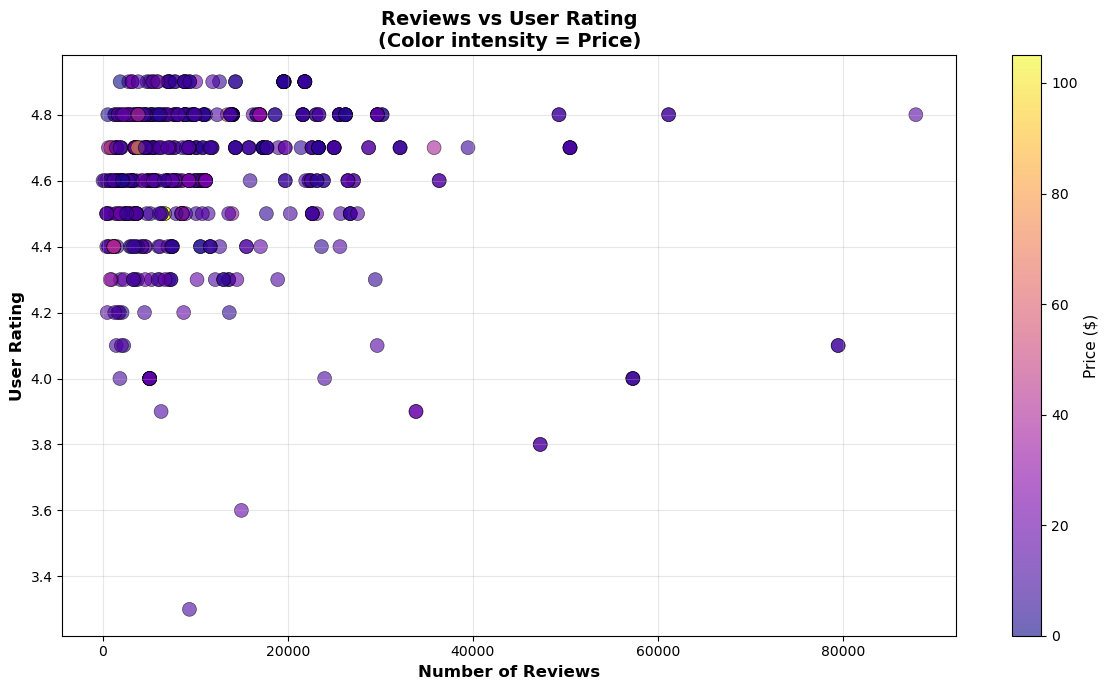

REVIEWS VS RATING CORRELATION
Correlation coefficient: -0.002
Interpretation: Weak negative correlation

💡 INSIGHT:
Among bestsellers, books with more reviews show a weak
negative relationship with ratings. This suggests that
popularity and quality perception are somewhat related among top books.


In [10]:
# ============================================================================
# CELL 9: REVIEWS VS RATING CORRELATION
# ============================================================================

plt.figure(figsize=(12, 7))
plt.scatter(df['Reviews'], df['User Rating'], alpha=0.6, s=100,
            c=df['Price'], cmap='plasma', edgecolors='black', linewidth=0.5)
plt.xlabel('Number of Reviews', fontsize=12, fontweight='bold')
plt.ylabel('User Rating', fontsize=12, fontweight='bold')
plt.title('Reviews vs User Rating\n(Color intensity = Price)', 
          fontsize=14, fontweight='bold')
cbar = plt.colorbar()
cbar.set_label('Price ($)', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['Reviews'].corr(df['User Rating'])
print("REVIEWS VS RATING CORRELATION")
print("="*70)
print(f"Correlation coefficient: {correlation:.3f}")

if abs(correlation) < 0.3:
    strength = "weak"
elif abs(correlation) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if correlation > 0 else "negative"

print(f"Interpretation: {strength.capitalize()} {direction} correlation")
print("\n💡 INSIGHT:")
print(f"Among bestsellers, books with more reviews show a {strength}")
print(f"{direction} relationship with ratings. This suggests that")
print("popularity and quality perception are somewhat related among top books.")
print("="*70)

In [ ]:
---
# 🔍 GENRE ANALYSIS
---

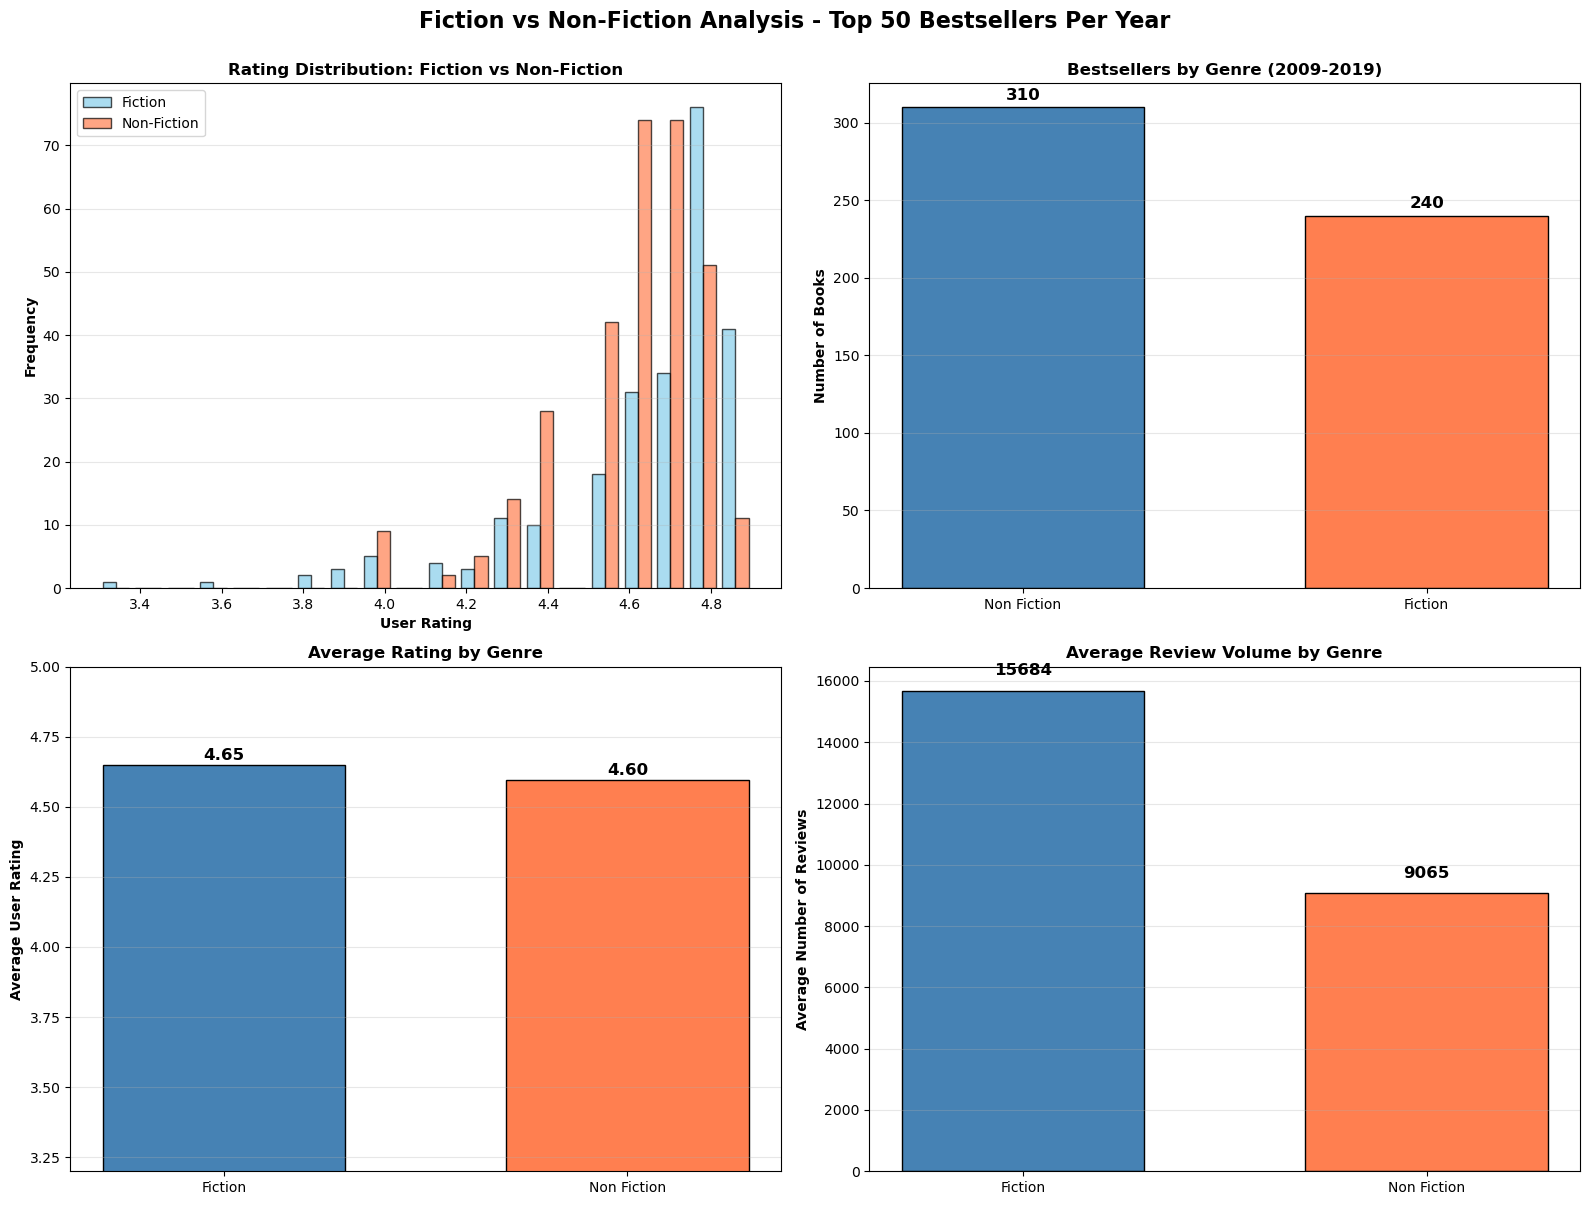


FICTION VS NON-FICTION STATISTICAL COMPARISON

Fiction Books (n=240):
   Average Rating: 4.65
   Median Rating: 4.70
   Average Reviews: 15684
   Average Price: $10.85

Non-Fiction Books (n=310):
   Average Rating: 4.60
   Median Rating: 4.60
   Average Reviews: 9065
   Average Price: $14.84

📊 KEY INSIGHTS:
   Fiction bestsellers average 0.05 points higher in rating
   Fiction books receive about 6619 more reviews on average
   Non-Fiction books are priced $3.99 higher on average


In [11]:
# ============================================================================
# CELL 10: FICTION VS NON-FICTION COMPREHENSIVE ANALYSIS
# ============================================================================

fiction = df[df['Genre'] == 'Fiction']
non_fiction = df[df['Genre'] == 'Non Fiction']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Rating Distribution by Genre
axes[0, 0].hist([fiction['User Rating'], non_fiction['User Rating']], 
                bins=20, label=['Fiction', 'Non-Fiction'], 
                color=['skyblue', 'coral'], alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('User Rating', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('Rating Distribution: Fiction vs Non-Fiction', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Book Count by Genre
genre_counts = df['Genre'].value_counts()
axes[0, 1].bar(genre_counts.index, genre_counts.values, 
               color=['steelblue', 'coral'], edgecolor='black', width=0.6)
axes[0, 1].set_ylabel('Number of Books', fontweight='bold')
axes[0, 1].set_title('Bestsellers by Genre (2009-2019)', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, (idx, val) in enumerate(genre_counts.items()):
    axes[0, 1].text(i, val + 5, str(val), ha='center', fontweight='bold', fontsize=12)

# 3. Average Rating by Genre
avg_ratings = df.groupby('Genre')['User Rating'].mean()
axes[1, 0].bar(avg_ratings.index, avg_ratings.values,
               color=['steelblue', 'coral'], edgecolor='black', width=0.6)
axes[1, 0].set_ylabel('Average User Rating', fontweight='bold')
axes[1, 0].set_title('Average Rating by Genre', fontweight='bold')
axes[1, 0].set_ylim(df['User Rating'].min() - 0.1, df['User Rating'].max() + 0.1)
axes[1, 0].grid(axis='y', alpha=0.3)
for i, (idx, val) in enumerate(avg_ratings.items()):
    axes[1, 0].text(i, val + 0.02, f'{val:.2f}', ha='center', fontweight='bold', fontsize=12)

# 4. Average Reviews by Genre
avg_reviews = df.groupby('Genre')['Reviews'].mean()
axes[1, 1].bar(avg_reviews.index, avg_reviews.values,
               color=['steelblue', 'coral'], edgecolor='black', width=0.6)
axes[1, 1].set_ylabel('Average Number of Reviews', fontweight='bold')
axes[1, 1].set_title('Average Review Volume by Genre', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, (idx, val) in enumerate(avg_reviews.items()):
    axes[1, 1].text(i, val + 500, f'{val:.0f}', ha='center', fontweight='bold', fontsize=12)

plt.suptitle('Fiction vs Non-Fiction Analysis - Top 50 Bestsellers Per Year', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Print statistical comparison
print("\n" + "="*70)
print("FICTION VS NON-FICTION STATISTICAL COMPARISON")
print("="*70)
print(f"\nFiction Books (n={len(fiction)}):")
print(f"   Average Rating: {fiction['User Rating'].mean():.2f}")
print(f"   Median Rating: {fiction['User Rating'].median():.2f}")
print(f"   Average Reviews: {fiction['Reviews'].mean():.0f}")
print(f"   Average Price: ${fiction['Price'].mean():.2f}")

print(f"\nNon-Fiction Books (n={len(non_fiction)}):")
print(f"   Average Rating: {non_fiction['User Rating'].mean():.2f}")
print(f"   Median Rating: {non_fiction['User Rating'].median():.2f}")
print(f"   Average Reviews: {non_fiction['Reviews'].mean():.0f}")
print(f"   Average Price: ${non_fiction['Price'].mean():.2f}")

print(f"\n📊 KEY INSIGHTS:")
rating_diff = fiction['User Rating'].mean() - non_fiction['User Rating'].mean()
if abs(rating_diff) > 0.05:
    if rating_diff > 0:
        print(f"   Fiction bestsellers average {rating_diff:.2f} points higher in rating")
    else:
        print(f"   Non-Fiction bestsellers average {abs(rating_diff):.2f} points higher in rating")
else:
    print("   Fiction and Non-Fiction have very similar average ratings")

review_diff = fiction['Reviews'].mean() - non_fiction['Reviews'].mean()
if abs(review_diff) > 1000:
    if review_diff > 0:
        print(f"   Fiction books receive about {review_diff:.0f} more reviews on average")
    else:
        print(f"   Non-Fiction books receive about {abs(review_diff):.0f} more reviews on average")

price_diff = fiction['Price'].mean() - non_fiction['Price'].mean()
if abs(price_diff) > 1:
    if price_diff > 0:
        print(f"   Fiction books are priced ${price_diff:.2f} higher on average")
    else:
        print(f"   Non-Fiction books are priced ${abs(price_diff):.2f} higher on average")

print("="*70)

In [ ]:
---
# 📚 TOP RATED BOOKS ANALYSIS
---

In [12]:
# ============================================================================
# CELL 11: TOP 10 HIGHEST RATED BOOKS
# ============================================================================

print("="*80)
print("TOP 10 HIGHEST RATED BESTSELLERS (2009-2019)")
print("="*80)
top_10 = df.nlargest(10, 'User Rating')[['Name', 'Author', 'User Rating', 'Reviews', 'Year', 'Genre', 'Price']]
print(top_10.to_string(index=False))

print("\n📊 GENRE BREAKDOWN OF TOP 10:")
top_10_genre_counts = top_10['Genre'].value_counts()
for genre, count in top_10_genre_counts.items():
    percentage = (count/10)*100
    print(f"   {genre}: {count} books ({percentage:.0f}%)")

print("\n💡 OBSERVATION:")
print("Several of the highest-rated bestsellers appear to be children's books")
print("(identifiable by titles and authors). Children's literature tends to")
print("achieve very high ratings among bestsellers, possibly due to:")
print("  • Nostalgia and emotional connection")
print("  • Multi-generational appeal (parents + children)")
print("  • Classic, time-tested quality")
print("  • Simpler narratives leading to higher satisfaction")
print("\n⚠️ Note: This dataset categorizes books only as Fiction/Non-Fiction,")
print("not by sub-genres like Children's, Mystery, Romance, etc.")
print("="*80)

TOP 10 HIGHEST RATED BESTSELLERS (2009-2019)
                                                                                           Name               Author  User Rating  Reviews  Year   Genre  Price
                                                       Brown Bear, Brown Bear, What Do You See?      Bill Martin Jr.          4.9    14344  2017 Fiction      5
                                                       Brown Bear, Brown Bear, What Do You See?      Bill Martin Jr.          4.9    14344  2019 Fiction      5
                       Dog Man and Cat Kid: From the Creator of Captain Underpants (Dog Man #4)           Dav Pilkey          4.9     5062  2018 Fiction      6
            Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3)           Dav Pilkey          4.9     4786  2017 Fiction      8
                Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6)           Dav Pilkey          4.9     7235  2018 Fiction   

In [13]:
# ============================================================================
# CELL 12: TOP 50 HIGHEST RATED BOOKS - BROADER VIEW
# ============================================================================

print("="*80)
print("TOP 50 HIGHEST RATED BESTSELLERS - BROADER PERSPECTIVE")
print("="*80)
top_50 = df.nlargest(50, 'User Rating')

print("📊 Fiction vs Non-Fiction in Top 50:")
top_50_genre_counts = top_50['Genre'].value_counts()
for genre, count in top_50_genre_counts.items():
    percentage = (count/50)*100
    print(f"   {genre}: {count} books ({percentage:.1f}%)")

print(f"\n📈 Statistics for Top 50:")
print(f"   Average Rating: {top_50['User Rating'].mean():.2f}")
print(f"   Rating Range: {top_50['User Rating'].min():.2f} - {top_50['User Rating'].max():.2f}")
print(f"   Average Reviews: {top_50['Reviews'].mean():.0f}")
print(f"   Average Price: ${top_50['Price'].mean():.2f}")

print("\n📚 Sample of Top 50 (rows 11-25, showing diversity beyond top 10):")
sample = top_50.iloc[10:25][['Name', 'Author', 'User Rating', 'Reviews', 'Genre']]
print(sample.to_string(index=False))

print("\n💡 INSIGHT:")
print("While the absolute top 10 includes several children's books,")
print("the top 50 shows greater diversity, with high-rated bestsellers")
print("across both Fiction and Non-Fiction categories. This demonstrates")
print("the importance of looking beyond just the top rankings to understand")
print("the full picture of bestseller characteristics.")
print("="*80)

TOP 50 HIGHEST RATED BESTSELLERS - BROADER PERSPECTIVE
📊 Fiction vs Non-Fiction in Top 50:
   Fiction: 40 books (80.0%)
   Non Fiction: 10 books (20.0%)

📈 Statistics for Top 50:
   Average Rating: 4.90
   Rating Range: 4.90 - 4.90
   Average Reviews: 13168
   Average Price: $10.32

📚 Sample of Top 50 (rows 11-25, showing diversity beyond top 10):
                                                                                                                   Name               Author  User Rating  Reviews       Genre
                        Goodnight, Goodnight Construction Site (Hardcover Books for Toddlers, Preschool Books for Kids) Sherri Duskey Rinker          4.9     7038     Fiction
                                                                                               Hamilton: The Revolution   Lin-Manuel Miranda          4.9     5867 Non Fiction
                                Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)      

In [14]:
# ============================================================================
# CELL 13: IDENTIFY OUTLIERS
# ============================================================================

print("="*80)
print("OUTLIER ANALYSIS - WITHIN BESTSELLERS")
print("="*80)

# Lowest rated bestsellers (still made top 50 for their year!)
print("\n📉 LOWEST RATED BOOKS (Still in Top 50 for their year):")
print("-"*80)
lowest = df.nsmallest(10, 'User Rating')[['Name', 'Author', 'User Rating', 'Reviews', 'Year', 'Genre']]
print(lowest.to_string(index=False))
print("\n💡 Even the 'lowest' rated books here were bestsellers in their year!")

# Highest rated with many reviews (true standouts)
print("\n" + "="*80)
print("⭐ STANDOUT BESTSELLERS (Rating ≥ 4.8 AND Reviews ≥ 10,000)")
print("-"*80)
high_quality = df[(df['User Rating'] >= 4.8) & (df['Reviews'] >= 10000)]
if len(high_quality) > 0:
    print(f"Found {len(high_quality)} standout books:\n")
    print(high_quality[['Name', 'Author', 'User Rating', 'Reviews', 'Year', 'Genre']].to_string(index=False))
else:
    print("No books meet both criteria (Rating ≥ 4.8 AND Reviews ≥ 10,000)")

# Controversial bestsellers (high reviews but relatively lower ratings)
print("\n" + "="*80)
print("🔥 CONTROVERSIAL BESTSELLERS")
print("   (High review volume, but lower ratings relative to other bestsellers)")
print("-"*80)
review_threshold = df['Reviews'].quantile(0.75)
rating_threshold = df['User Rating'].median()
controversial = df[(df['Reviews'] >= review_threshold) & (df['User Rating'] < rating_threshold)]
if len(controversial) > 0:
    print(f"Found {len(controversial)} controversial bestsellers:\n")
    print(controversial[['Name', 'Author', 'User Rating', 'Reviews', 'Year', 'Genre']].to_string(index=False))
    print("\n💡 These books generated lots of discussion but divided readers more than typical bestsellers.")
else:
    print("No significant controversial bestsellers found with this criteria.")

print("="*80)

OUTLIER ANALYSIS - WITHIN BESTSELLERS

📉 LOWEST RATED BOOKS (Still in Top 50 for their year):
--------------------------------------------------------------------------------
                                                                                    Name        Author  User Rating  Reviews  Year   Genre
                                                                      The Casual Vacancy  J.K. Rowling          3.3     9372  2012 Fiction
                                                              Go Set a Watchman: A Novel    Harper Lee          3.6    14982  2015 Fiction
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)     E L James          3.8    47265  2012 Fiction
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)     E L James          3.8    47265  2013 Fiction
                                                                               Allegiant Veronica Roth          3.9     6310  2013

In [ ]:
---
# 🔗 CORRELATION ANALYSIS
---

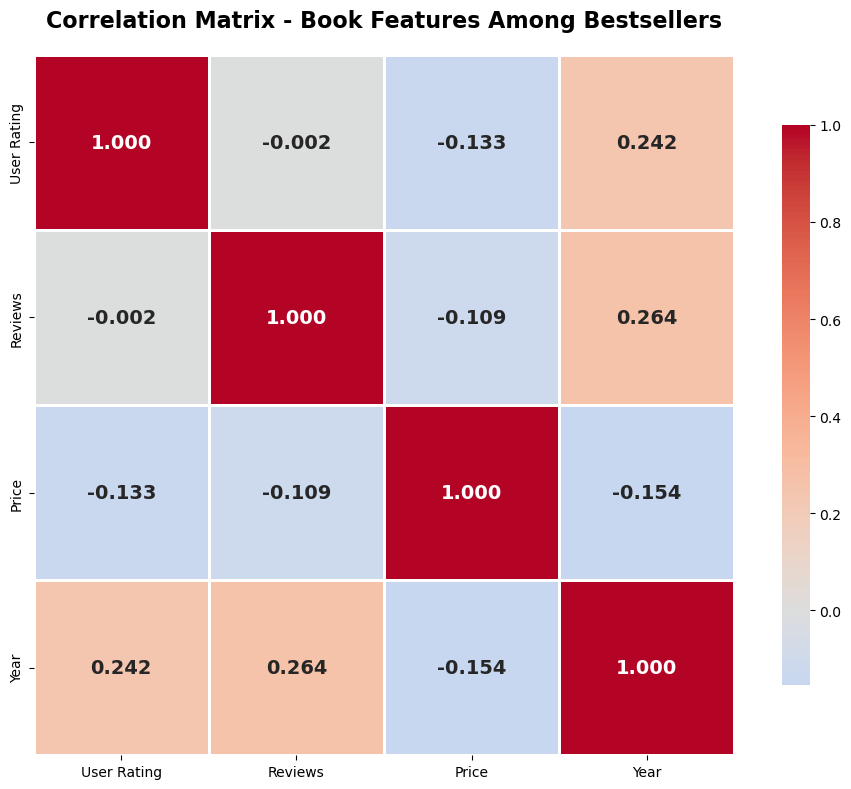

CORRELATION MATRIX INTERPRETATION

📊 Correlation Strengths:
   |r| < 0.3  → Weak correlation
   0.3 ≤ |r| < 0.7 → Moderate correlation
   |r| ≥ 0.7  → Strong correlation

--------------------------------------------------------------------------------
User Rating     vs Reviews        : -0.002  (Weak negative)
User Rating     vs Price          : -0.133  (Weak negative)
User Rating     vs Year           : +0.242  (Weak positive)
Reviews         vs Price          : -0.109  (Weak negative)
Reviews         vs Year           : +0.264  (Weak positive)
Price           vs Year           : -0.154  (Weak negative)

💡 KEY INSIGHTS:
   • Reviews and Ratings are weakly correlated (-0.002)
   • Price shows some relationship with ratings (-0.133)


In [15]:
# ============================================================================
# CELL 14: HEATMAP OF CORRELATION MATRIX
# ============================================================================

# Create correlation matrix for numeric columns
correlation_matrix = df[['User Rating', 'Reviews', 'Price', 'Year']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Show numbers
            fmt='.3f',            # 3 decimal places
            cmap='coolwarm',      # Color scheme (red=positive, blue=negative)
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            linewidths=2,         # Lines between cells
            cbar_kws={'shrink': 0.8},  # Colorbar size
            annot_kws={'size': 14, 'fontweight': 'bold'})    # Number font

plt.title('Correlation Matrix - Book Features Among Bestsellers', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print interpretation
print("="*80)
print("CORRELATION MATRIX INTERPRETATION")
print("="*80)
print("\n📊 Correlation Strengths:")
print("   |r| < 0.3  → Weak correlation")
print("   0.3 ≤ |r| < 0.7 → Moderate correlation")
print("   |r| ≥ 0.7  → Strong correlation")
print("\n" + "-"*80)

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        
        if abs(corr_value) >= 0.7:
            strength = "Strong"
        elif abs(corr_value) >= 0.3:
            strength = "Moderate"
        else:
            strength = "Weak"
        
        direction = "positive" if corr_value > 0 else "negative"
        
        print(f"{col1:15} vs {col2:15}: {corr_value:+.3f}  ({strength} {direction})")

print("\n💡 KEY INSIGHTS:")
reviews_rating_corr = correlation_matrix.loc['Reviews', 'User Rating']
price_rating_corr = correlation_matrix.loc['Price', 'User Rating']
year_rating_corr = correlation_matrix.loc['Year', 'User Rating']

if abs(reviews_rating_corr) > 0.3:
    print(f"   • Reviews and Ratings show a meaningful relationship ({reviews_rating_corr:.3f})")
else:
    print(f"   • Reviews and Ratings are weakly correlated ({reviews_rating_corr:.3f})")
    
if abs(price_rating_corr) > 0.1:
    print(f"   • Price shows some relationship with ratings ({price_rating_corr:.3f})")
else:
    print(f"   • Price has minimal impact on ratings among bestsellers ({price_rating_corr:.3f})")

print("="*80)

In [ ]:
---
# ⏰ TIME-BASED ANALYSIS
---

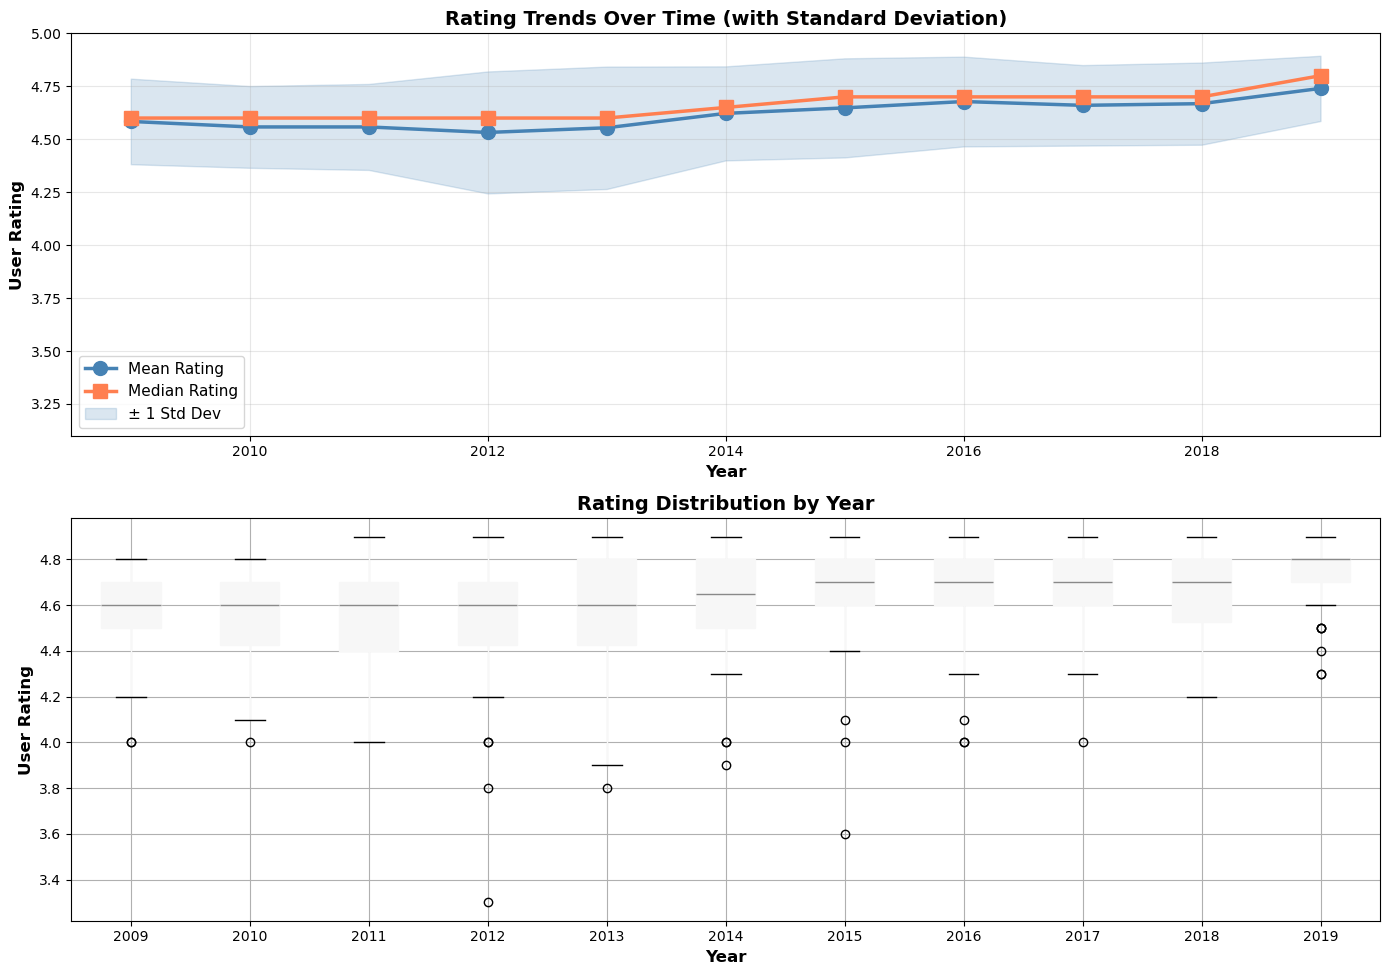

RATING TRENDS OVER TIME (2009-2019)

Yearly Statistics:
       mean  median    std  count
Year                             
2009  4.584    4.60  0.202     50
2010  4.558    4.60  0.193     50
2011  4.558    4.60  0.203     50
2012  4.532    4.60  0.288     50
2013  4.554    4.60  0.289     50
2014  4.622    4.65  0.222     50
2015  4.648    4.70  0.234     50
2016  4.678    4.70  0.212     50
2017  4.660    4.70  0.190     50
2018  4.668    4.70  0.194     50
2019  4.740    4.80  0.154     50

📈 Trend Analysis (Linear Regression):
   Slope: 0.0174 (rating change per year)
   R-squared: 0.0587
   P-value: 0.0000

💡 INSIGHT: Ratings show a statistically significant INCREASING trend


In [16]:
# ============================================================================
# CELL 15: RATING TRENDS OVER TIME
# ============================================================================

# Average rating by year
rating_by_year = df.groupby('Year')['User Rating'].agg(['mean', 'median', 'std', 'count']).round(3)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Line plot with error bands
axes[0].plot(rating_by_year.index, rating_by_year['mean'], 
             marker='o', linewidth=2.5, markersize=10, label='Mean Rating', color='steelblue')
axes[0].plot(rating_by_year.index, rating_by_year['median'], 
             marker='s', linewidth=2.5, markersize=10, label='Median Rating', color='coral')
axes[0].fill_between(rating_by_year.index, 
                      rating_by_year['mean'] - rating_by_year['std'], 
                      rating_by_year['mean'] + rating_by_year['std'], 
                      alpha=0.2, color='steelblue', label='± 1 Std Dev')
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('User Rating', fontsize=12, fontweight='bold')
axes[0].set_title('Rating Trends Over Time (with Standard Deviation)', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(df['User Rating'].min() - 0.2, df['User Rating'].max() + 0.1)

# Box plot
df.boxplot(column='User Rating', by='Year', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('User Rating', fontsize=12, fontweight='bold')
axes[1].set_title('Rating Distribution by Year', fontsize=14, fontweight='bold')
axes[1].get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Statistical analysis
print("="*80)
print("RATING TRENDS OVER TIME (2009-2019)")
print("="*80)
print("\nYearly Statistics:")
print(rating_by_year)

# Linear regression test
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'], df['User Rating'])
print(f"\n📈 Trend Analysis (Linear Regression):")
print(f"   Slope: {slope:.4f} (rating change per year)")
print(f"   R-squared: {r_value**2:.4f}")
print(f"   P-value: {p_value:.4f}")

if p_value < 0.05:
    if slope > 0:
        print(f"\n💡 INSIGHT: Ratings show a statistically significant INCREASING trend")
    else:
        print(f"\n💡 INSIGHT: Ratings show a statistically significant DECREASING trend")
else:
    print(f"\n💡 INSIGHT: No statistically significant trend in ratings over time")
    print("   Bestseller ratings have remained relatively stable across the decade")

print("="*80)

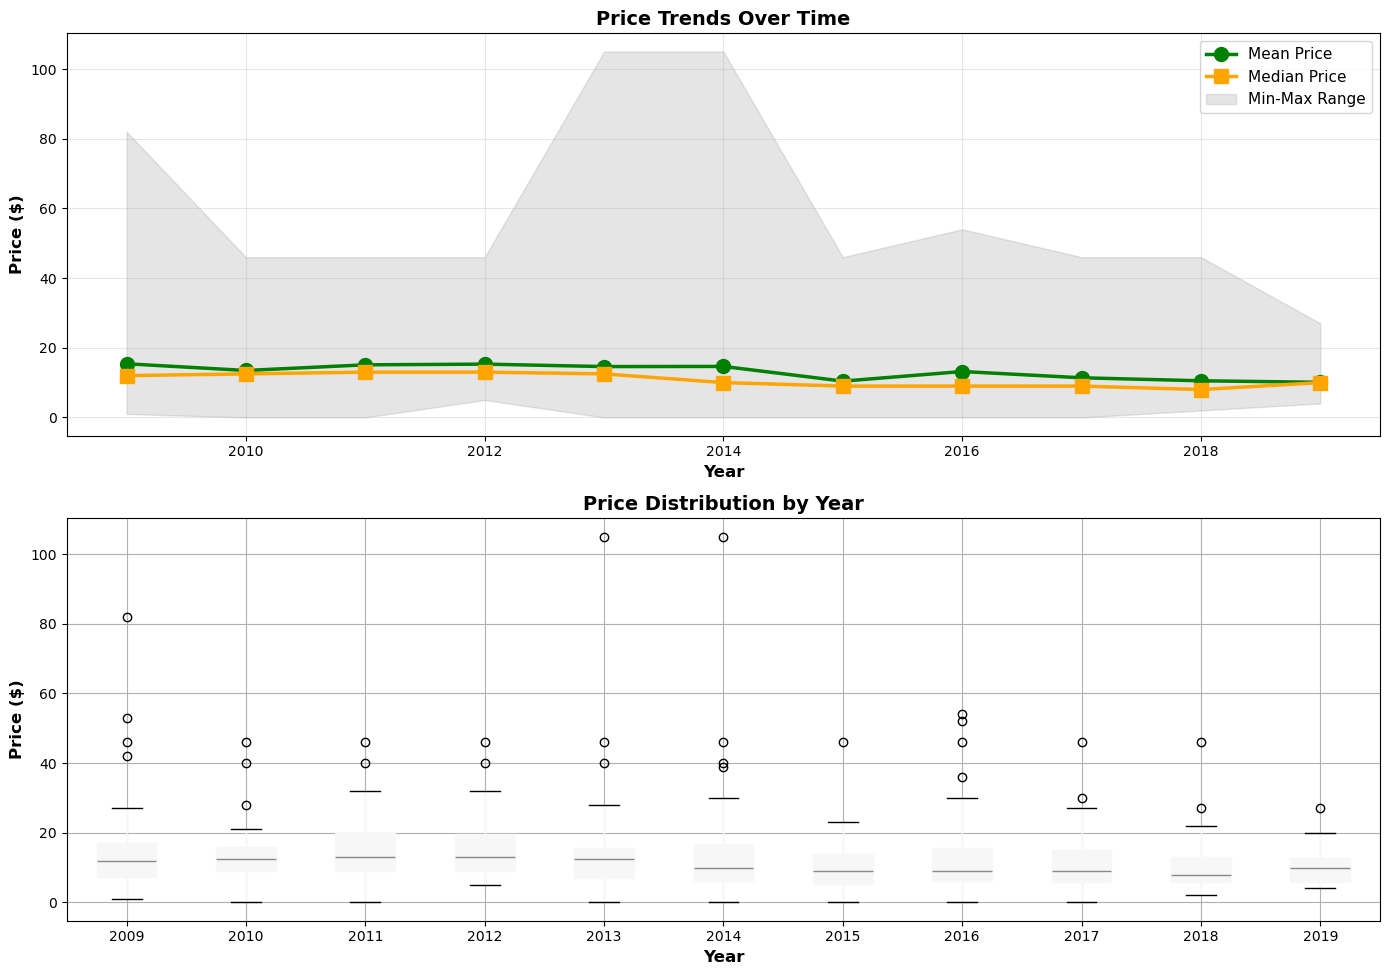

PRICE TRENDS OVER TIME (2009-2019)

Yearly Statistics:
       mean  median    std  min  max
Year                                
2009  15.40    12.0  14.05    1   82
2010  13.48    12.5   8.16    0   46
2011  15.10    13.0   8.85    0   46
2012  15.30    13.0   8.77    5   46
2013  14.60    12.5  15.52    0  105
2014  14.64    10.0  16.57    0  105
2015  10.42     9.0   7.07    0   46
2016  13.18     9.0  11.81    0   54
2017  11.38     9.0   8.19    0   46
2018  10.52     8.0   7.47    2   46
2019  10.08    10.0   4.90    4   27

📈 Trend Analysis (Linear Regression):
   Slope: $-0.53 (price change per year)
   R-squared: 0.0237
   P-value: 0.0003

💡 INSIGHT: Bestseller prices show a statistically significant DECREASE
   of approximately $0.53 per year


In [17]:
# ============================================================================
# CELL 16: AVERAGE PRICE BY YEAR
# ============================================================================

price_by_year = df.groupby('Year')['Price'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Line plot
axes[0].plot(price_by_year.index, price_by_year['mean'], 
             marker='o', linewidth=2.5, markersize=10, label='Mean Price', color='green')
axes[0].plot(price_by_year.index, price_by_year['median'], 
             marker='s', linewidth=2.5, markersize=10, label='Median Price', color='orange')
axes[0].fill_between(price_by_year.index, price_by_year['min'], price_by_year['max'], 
                      alpha=0.2, label='Min-Max Range', color='gray')
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Price ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Price Trends Over Time', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Box plot
df.boxplot(column='Price', by='Year', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Price ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Price Distribution by Year', fontsize=14, fontweight='bold')
axes[1].get_figure().suptitle('')

plt.tight_layout()
plt.show()

# Statistical analysis
print("="*80)
print("PRICE TRENDS OVER TIME (2009-2019)")
print("="*80)
print("\nYearly Statistics:")
print(price_by_year)

# Linear regression test
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'], df['Price'])
print(f"\n📈 Trend Analysis (Linear Regression):")
print(f"   Slope: ${slope:.2f} (price change per year)")
print(f"   R-squared: {r_value**2:.4f}")
print(f"   P-value: {p_value:.4f}")

if p_value < 0.05:
    if slope > 0:
        print(f"\n💡 INSIGHT: Bestseller prices show a statistically significant INCREASE")
        print(f"   of approximately ${slope:.2f} per year")
    else:
        print(f"\n💡 INSIGHT: Bestseller prices show a statistically significant DECREASE")
        print(f"   of approximately ${abs(slope):.2f} per year")
else:
    print(f"\n💡 INSIGHT: No statistically significant trend in bestseller pricing")
    print("   Prices have remained relatively stable across the decade")

print("="*80)

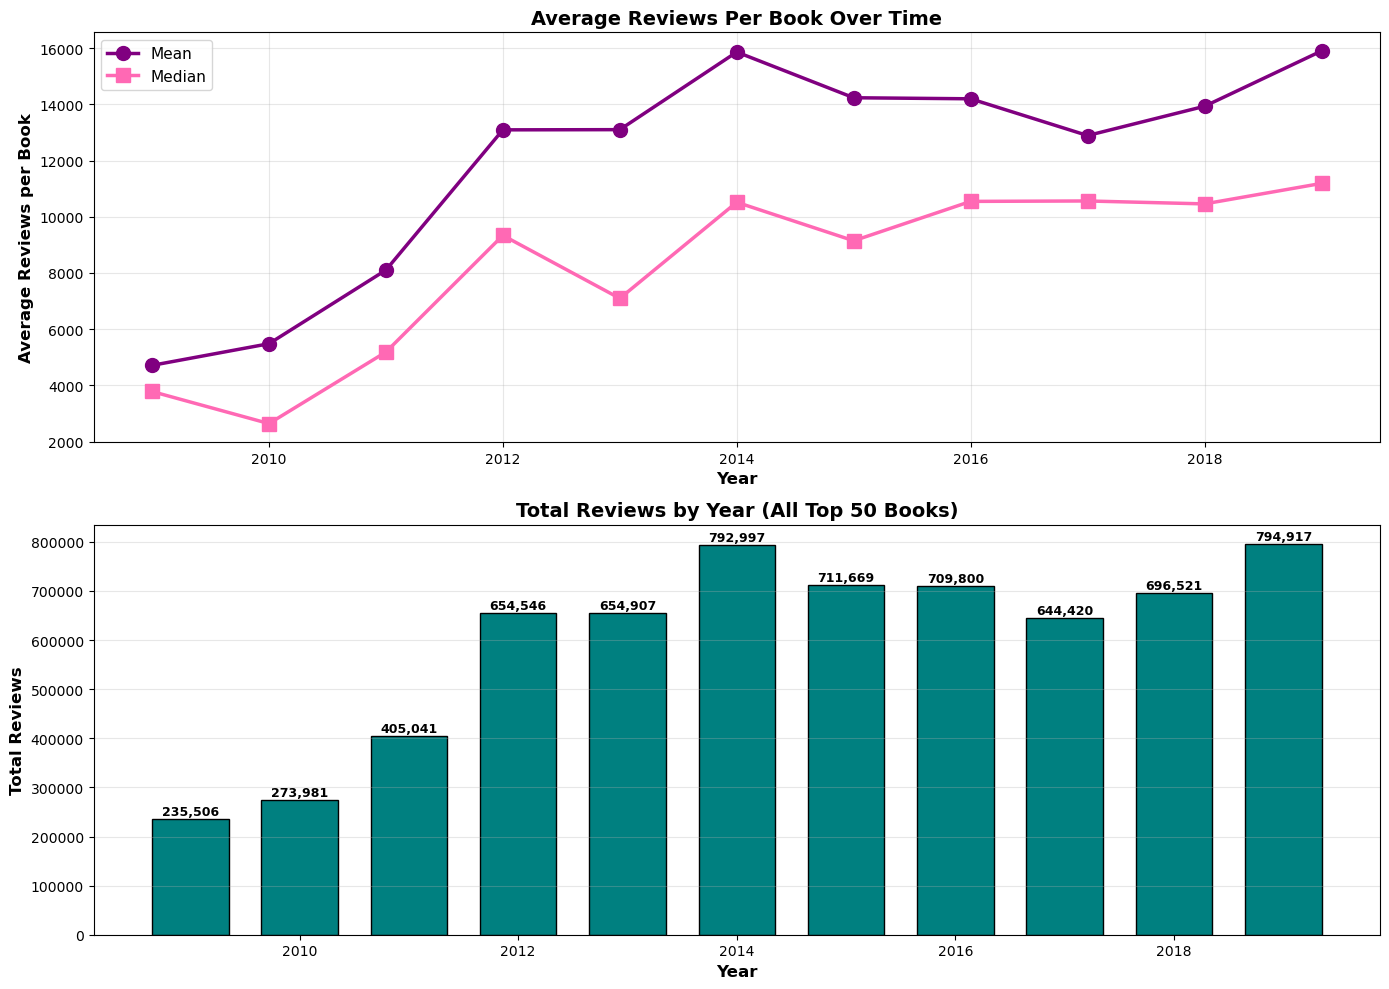

REVIEW TRENDS OVER TIME (2009-2019)

Yearly Statistics:
         mean   median     sum  count
Year                                 
2009   4710.0   3780.0  235506     50
2010   5480.0   2638.0  273981     50
2011   8101.0   5184.0  405041     50
2012  13091.0   9334.0  654546     50
2013  13098.0   7094.0  654907     50
2014  15860.0  10514.0  792997     50
2015  14233.0   9144.0  711669     50
2016  14196.0  10545.0  709800     50
2017  12888.0  10560.0  644420     50
2018  13930.0  10456.0  696521     50
2019  15898.0  11185.0  794917     50

📈 Trend Analysis (Linear Regression):
   Slope: 977 (review change per year)
   R-squared: 0.0695
   P-value: 0.0000

💡 INSIGHT: Review volume shows a statistically significant INCREASE
   Bestsellers are receiving more engagement over time


In [18]:
# ============================================================================
# CELL 17: AVERAGE REVIEWS BY YEAR
# ============================================================================

reviews_by_year = df.groupby('Year')['Reviews'].agg(['mean', 'median', 'sum', 'count']).round(0)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Average reviews
axes[0].plot(reviews_by_year.index, reviews_by_year['mean'], 
             marker='o', linewidth=2.5, markersize=10, color='purple', label='Mean')
axes[0].plot(reviews_by_year.index, reviews_by_year['median'], 
             marker='s', linewidth=2.5, markersize=10, color='hotpink', label='Median')
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Reviews per Book', fontsize=12, fontweight='bold')
axes[0].set_title('Average Reviews Per Book Over Time', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Total reviews per year
axes[1].bar(reviews_by_year.index, reviews_by_year['sum'], 
            color='teal', edgecolor='black', width=0.7)
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Total Reviews', fontsize=12, fontweight='bold')
axes[1].set_title('Total Reviews by Year (All Top 50 Books)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (year, val) in enumerate(zip(reviews_by_year.index, reviews_by_year['sum'])):
    axes[1].text(year, val + max(reviews_by_year['sum'])*0.01, 
                f'{val:,.0f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("="*80)
print("REVIEW TRENDS OVER TIME (2009-2019)")
print("="*80)
print("\nYearly Statistics:")
print(reviews_by_year)

# Statistical analysis
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'], df['Reviews'])
print(f"\n📈 Trend Analysis (Linear Regression):")
print(f"   Slope: {slope:.0f} (review change per year)")
print(f"   R-squared: {r_value**2:.4f}")
print(f"   P-value: {p_value:.4f}")

if p_value < 0.05:
    if slope > 0:
        print(f"\n💡 INSIGHT: Review volume shows a statistically significant INCREASE")
        print(f"   Bestsellers are receiving more engagement over time")
    else:
        print(f"\n💡 INSIGHT: Review volume shows a statistically significant DECREASE")
else:
    print(f"\n💡 INSIGHT: No statistically significant trend in review volume")

print("="*80)

YEAR-OVER-YEAR CHANGES (2009-2019)
      Avg_Rating  Avg_Price  Avg_Reviews  Book_Count  Rating_Change_%  \
Year                                                                    
2009        4.58      15.40      4710.12          50              NaN   
2010        4.56      13.48      5479.62          50            -0.44   
2011        4.56      15.10      8100.82          50             0.00   
2012        4.53      15.30     13090.92          50            -0.66   
2013        4.55      14.60     13098.14          50             0.44   
2014        4.62      14.64     15859.94          50             1.54   
2015        4.65      10.42     14233.38          50             0.65   
2016        4.68      13.18     14196.00          50             0.65   
2017        4.66      11.38     12888.40          50            -0.43   
2018        4.67      10.52     13930.42          50             0.21   
2019        4.74      10.08     15898.34          50             1.50   

      Price_Cha

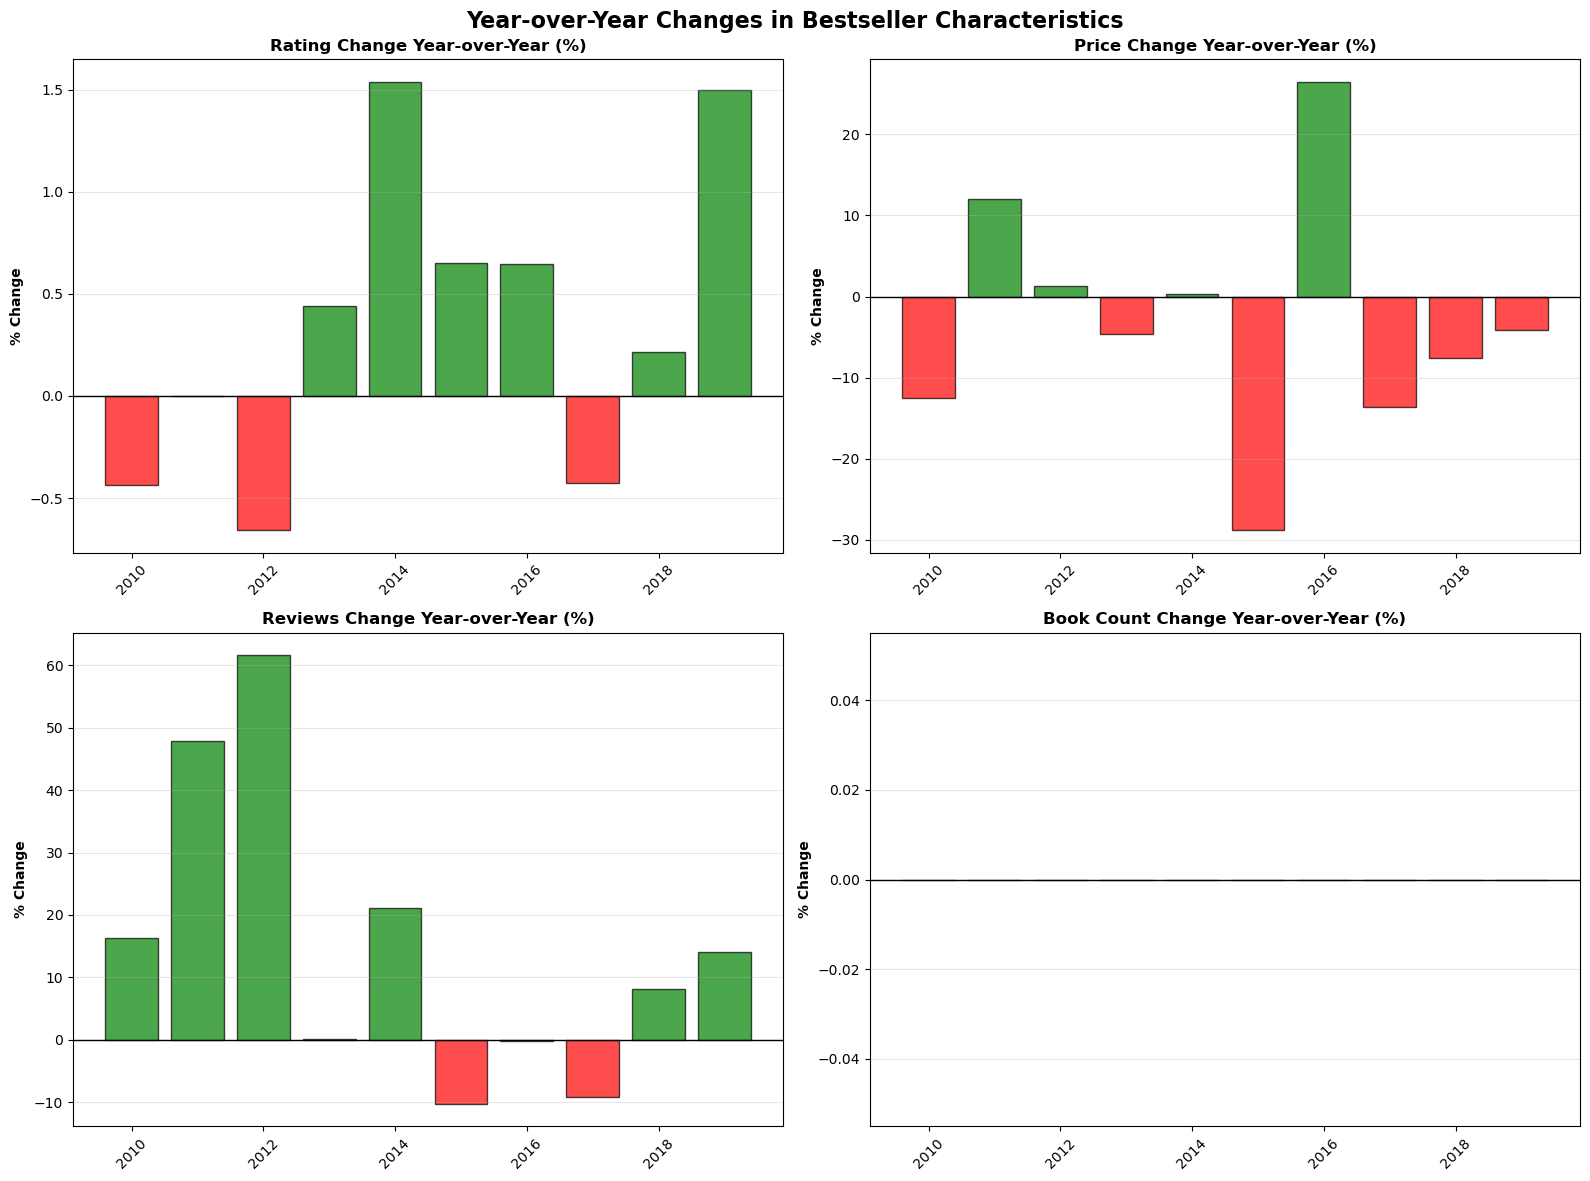


💡 KEY OBSERVATIONS:
   • Largest rating increase: 1.54% in 2014
   • Largest price increase: 26.49% in 2016
   • Largest review increase: 61.60% in 2012


In [19]:
# ============================================================================
# CELL 18: YEAR-OVER-YEAR CHANGES
# ============================================================================

# Calculate yearly summaries
yearly_summary = df.groupby('Year').agg({
    'User Rating': 'mean',
    'Price': 'mean',
    'Reviews': 'mean',
    'Name': 'count'
}).round(2)

yearly_summary.columns = ['Avg_Rating', 'Avg_Price', 'Avg_Reviews', 'Book_Count']

# Calculate percentage changes
yearly_summary['Rating_Change_%'] = yearly_summary['Avg_Rating'].pct_change() * 100
yearly_summary['Price_Change_%'] = yearly_summary['Avg_Price'].pct_change() * 100
yearly_summary['Reviews_Change_%'] = yearly_summary['Avg_Reviews'].pct_change() * 100
yearly_summary['Book_Count_Change_%'] = yearly_summary['Book_Count'].pct_change() * 100

print("="*80)
print("YEAR-OVER-YEAR CHANGES (2009-2019)")
print("="*80)
print(yearly_summary.round(2))

# Visualize YoY changes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Rating changes
axes[0,0].bar(yearly_summary.index[1:], yearly_summary['Rating_Change_%'][1:], 
              color=['green' if x > 0 else 'red' for x in yearly_summary['Rating_Change_%'][1:]], 
              edgecolor='black', alpha=0.7)
axes[0,0].set_title('Rating Change Year-over-Year (%)', fontweight='bold')
axes[0,0].set_ylabel('% Change', fontweight='bold')
axes[0,0].axhline(0, color='black', linewidth=1)
axes[0,0].grid(axis='y', alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# Price changes
axes[0,1].bar(yearly_summary.index[1:], yearly_summary['Price_Change_%'][1:], 
              color=['green' if x > 0 else 'red' for x in yearly_summary['Price_Change_%'][1:]], 
              edgecolor='black', alpha=0.7)
axes[0,1].set_title('Price Change Year-over-Year (%)', fontweight='bold')
axes[0,1].set_ylabel('% Change', fontweight='bold')
axes[0,1].axhline(0, color='black', linewidth=1)
axes[0,1].grid(axis='y', alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=45)

# Reviews changes
axes[1,0].bar(yearly_summary.index[1:], yearly_summary['Reviews_Change_%'][1:], 
              color=['green' if x > 0 else 'red' for x in yearly_summary['Reviews_Change_%'][1:]], 
              edgecolor='black', alpha=0.7)
axes[1,0].set_title('Reviews Change Year-over-Year (%)', fontweight='bold')
axes[1,0].set_ylabel('% Change', fontweight='bold')
axes[1,0].axhline(0, color='black', linewidth=1)
axes[1,0].grid(axis='y', alpha=0.3)
axes[1,0].tick_params(axis='x', rotation=45)

# Book count changes
axes[1,1].bar(yearly_summary.index[1:], yearly_summary['Book_Count_Change_%'][1:], 
              color=['green' if x > 0 else 'red' for x in yearly_summary['Book_Count_Change_%'][1:]], 
              edgecolor='black', alpha=0.7)
axes[1,1].set_title('Book Count Change Year-over-Year (%)', fontweight='bold')
axes[1,1].set_ylabel('% Change', fontweight='bold')
axes[1,1].axhline(0, color='black', linewidth=1)
axes[1,1].grid(axis='y', alpha=0.3)
axes[1,1].tick_params(axis='x', rotation=45)

plt.suptitle('Year-over-Year Changes in Bestseller Characteristics', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 KEY OBSERVATIONS:")
print(f"   • Largest rating increase: {yearly_summary['Rating_Change_%'].max():.2f}% in {yearly_summary['Rating_Change_%'].idxmax()}")
print(f"   • Largest price increase: {yearly_summary['Price_Change_%'].max():.2f}% in {yearly_summary['Price_Change_%'].idxmax()}")
print(f"   • Largest review increase: {yearly_summary['Reviews_Change_%'].max():.2f}% in {yearly_summary['Reviews_Change_%'].idxmax()}")
print("="*80)

In [ ]:
---
# 🔬 ADVANCED ANALYSIS
---

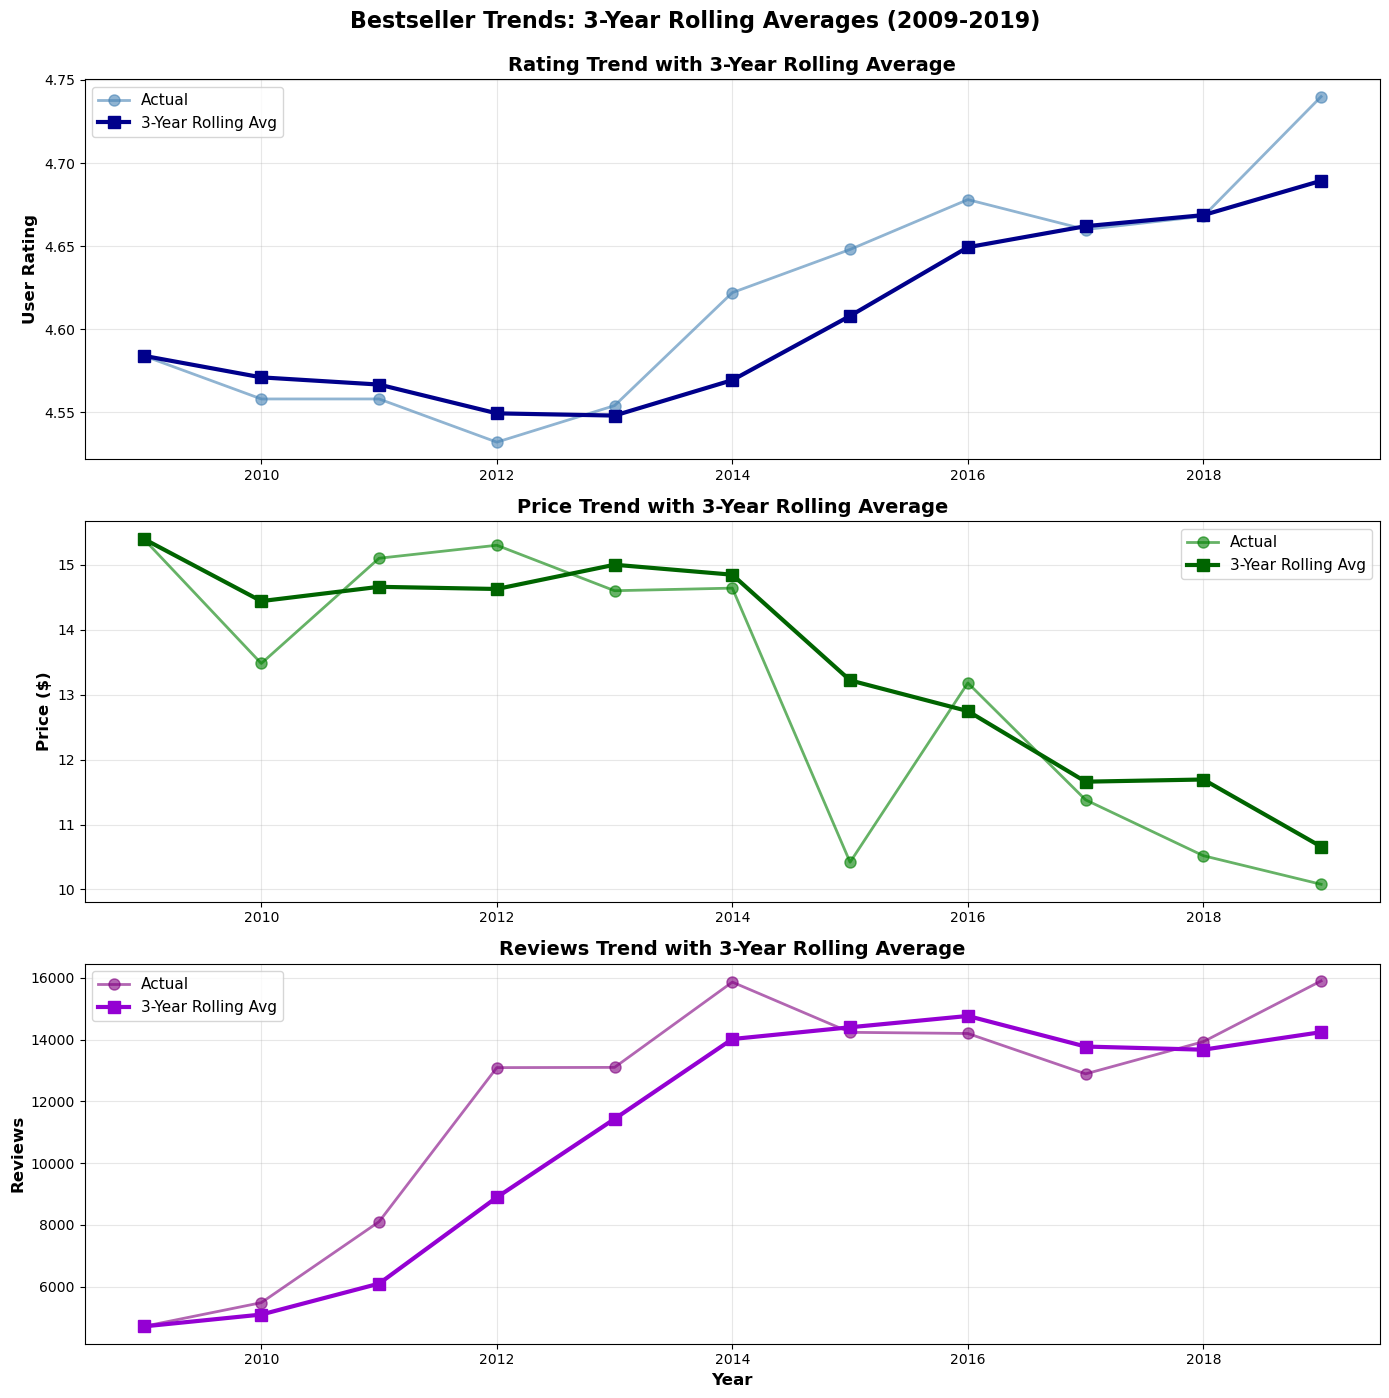

3-YEAR ROLLING AVERAGES

Smoothed Trends (reducing year-to-year noise):
      User Rating  Price   Reviews  Rating_Rolling  Price_Rolling  \
Year                                                                
2009         4.58  15.40   4710.12            4.58          15.40   
2010         4.56  13.48   5479.62            4.57          14.44   
2011         4.56  15.10   8100.82            4.57          14.66   
2012         4.53  15.30  13090.92            4.55          14.63   
2013         4.55  14.60  13098.14            4.55          15.00   
2014         4.62  14.64  15859.94            4.57          14.85   
2015         4.65  10.42  14233.38            4.61          13.22   
2016         4.68  13.18  14196.00            4.65          12.75   
2017         4.66  11.38  12888.40            4.66          11.66   
2018         4.67  10.52  13930.42            4.67          11.69   
2019         4.74  10.08  15898.34            4.69          10.66   

      Reviews_Rolling  
Year  

In [20]:
# ============================================================================
# CELL 19: ROLLING AVERAGES (3-YEAR WINDOW)
# ============================================================================

# Calculate rolling averages
yearly_data = df.groupby('Year').agg({
    'User Rating': 'mean',
    'Price': 'mean',
    'Reviews': 'mean'
}).sort_index()

# Calculate rolling means
yearly_data['Rating_Rolling'] = yearly_data['User Rating'].rolling(window=3, min_periods=1).mean()
yearly_data['Price_Rolling'] = yearly_data['Price'].rolling(window=3, min_periods=1).mean()
yearly_data['Reviews_Rolling'] = yearly_data['Reviews'].rolling(window=3, min_periods=1).mean()

# Plot
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

# Rating
axes[0].plot(yearly_data.index, yearly_data['User Rating'], 
             marker='o', label='Actual', alpha=0.6, linewidth=2, markersize=8, color='steelblue')
axes[0].plot(yearly_data.index, yearly_data['Rating_Rolling'], 
             marker='s', label='3-Year Rolling Avg', linewidth=3, markersize=8, color='darkblue')
axes[0].set_ylabel('User Rating', fontweight='bold', fontsize=12)
axes[0].set_title('Rating Trend with 3-Year Rolling Average', fontweight='bold', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Price
axes[1].plot(yearly_data.index, yearly_data['Price'], 
             marker='o', label='Actual', alpha=0.6, linewidth=2, markersize=8, color='green')
axes[1].plot(yearly_data.index, yearly_data['Price_Rolling'], 
             marker='s', label='3-Year Rolling Avg', linewidth=3, markersize=8, color='darkgreen')
axes[1].set_ylabel('Price ($)', fontweight='bold', fontsize=12)
axes[1].set_title('Price Trend with 3-Year Rolling Average', fontweight='bold', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# Reviews
axes[2].plot(yearly_data.index, yearly_data['Reviews'], 
             marker='o', label='Actual', alpha=0.6, linewidth=2, markersize=8, color='purple')
axes[2].plot(yearly_data.index, yearly_data['Reviews_Rolling'], 
             marker='s', label='3-Year Rolling Avg', linewidth=3, markersize=8, color='darkviolet')
axes[2].set_xlabel('Year', fontweight='bold', fontsize=12)
axes[2].set_ylabel('Reviews', fontweight='bold', fontsize=12)
axes[2].set_title('Reviews Trend with 3-Year Rolling Average', fontweight='bold', fontsize=14)
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3)

plt.suptitle('Bestseller Trends: 3-Year Rolling Averages (2009-2019)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("="*80)
print("3-YEAR ROLLING AVERAGES")
print("="*80)
print("\nSmoothed Trends (reducing year-to-year noise):")
print(yearly_data.round(2))
print("\n💡 INSIGHT:")
print("Rolling averages help identify long-term trends by smoothing out")
print("year-to-year fluctuations. This reveals the underlying direction")
print("of bestseller characteristics over the decade.")
print("="*80)

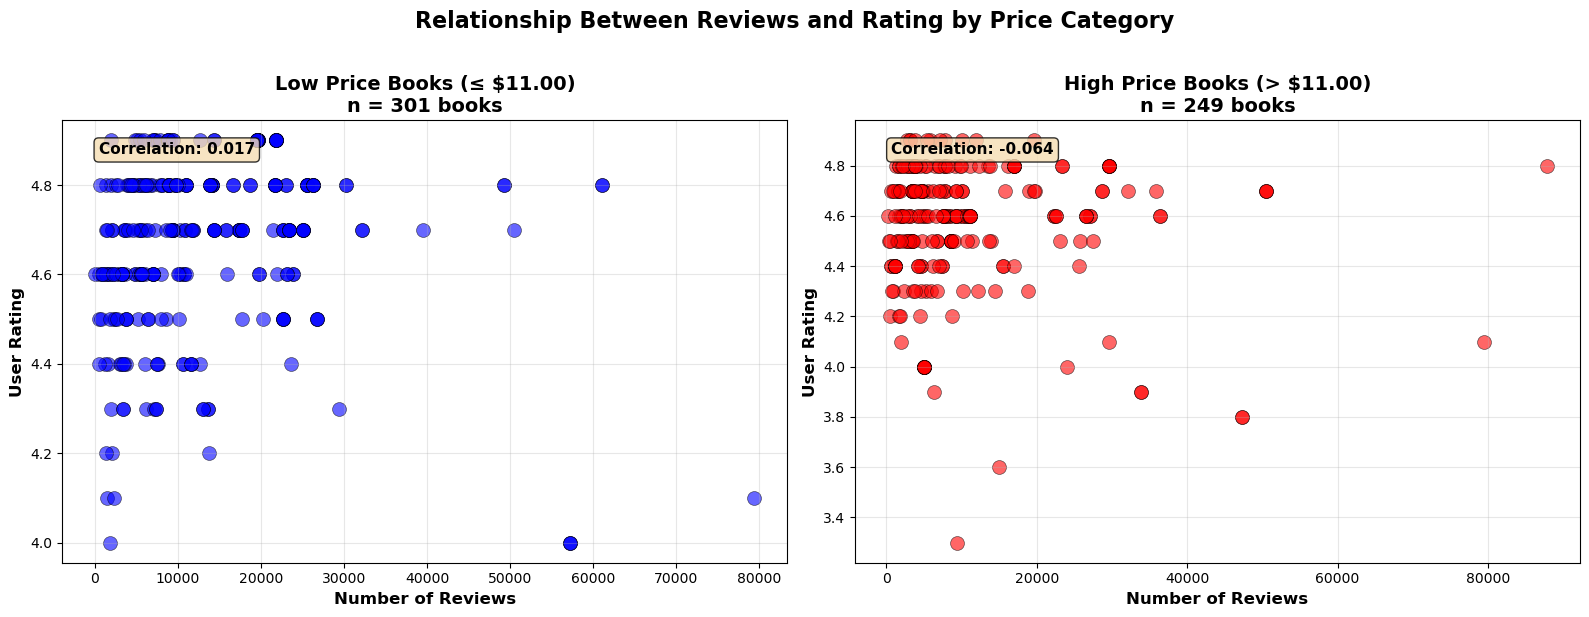

PRICE CATEGORY ANALYSIS - AMONG BESTSELLERS

💡 Research Question:
Do low-priced bestsellers differ from high-priced bestsellers
in terms of reviews and ratings?

--------------------------------------------------------------------------------
Median Price Split: $11.00

Low Price Books (≤ $11.00):
  Count: 301
  Avg Rating: 4.66
  Avg Reviews: 13060
  Reviews-Rating Correlation: 0.017

High Price Books (> $11.00):
  Count: 249
  Avg Rating: 4.56
  Avg Reviews: 10616
  Reviews-Rating Correlation: -0.064

📊 INTERPRETATION:
  Both price categories show similar correlations between reviews
  and ratings, suggesting price doesn't fundamentally change how
  readers evaluate bestsellers.


In [21]:
# ============================================================================
# CELL 20: DUAL SCATTER PLOTS - LOW VS HIGH PRICE BOOKS
# ============================================================================

# Split books into low and high price groups
median_price = df['Price'].median()
low_price_books = df[df['Price'] <= median_price]
high_price_books = df[df['Price'] > median_price]

# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Low price books
axes[0].scatter(low_price_books['Reviews'], 
                low_price_books['User Rating'], 
                alpha=0.6, 
                s=100,
                c='blue',
                edgecolors='black',
                linewidth=0.5)
axes[0].set_xlabel('Number of Reviews', fontsize=12, fontweight='bold')
axes[0].set_ylabel('User Rating', fontsize=12, fontweight='bold')
axes[0].set_title(f'Low Price Books (≤ ${median_price:.2f})\nn = {len(low_price_books)} books', 
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Calculate and show correlation
corr_low = low_price_books['Reviews'].corr(low_price_books['User Rating'])
axes[0].text(0.05, 0.95, f'Correlation: {corr_low:.3f}', 
             transform=axes[0].transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
             fontsize=11,
             verticalalignment='top',
             fontweight='bold')

# High price books
axes[1].scatter(high_price_books['Reviews'], 
                high_price_books['User Rating'], 
                alpha=0.6, 
                s=100,
                c='red',
                edgecolors='black',
                linewidth=0.5)
axes[1].set_xlabel('Number of Reviews', fontsize=12, fontweight='bold')
axes[1].set_ylabel('User Rating', fontsize=12, fontweight='bold')
axes[1].set_title(f'High Price Books (> ${median_price:.2f})\nn = {len(high_price_books)} books', 
                  fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Calculate and show correlation
corr_high = high_price_books['Reviews'].corr(high_price_books['User Rating'])
axes[1].text(0.05, 0.95, f'Correlation: {corr_high:.3f}', 
             transform=axes[1].transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
             fontsize=11,
             verticalalignment='top',
             fontweight='bold')

plt.suptitle('Relationship Between Reviews and Rating by Price Category', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print summary
print("="*80)
print("PRICE CATEGORY ANALYSIS - AMONG BESTSELLERS")
print("="*80)
print("\n💡 Research Question:")
print("Do low-priced bestsellers differ from high-priced bestsellers")
print("in terms of reviews and ratings?")
print("\n" + "-"*80)
print(f"Median Price Split: ${median_price:.2f}")
print(f"\nLow Price Books (≤ ${median_price:.2f}):")
print(f"  Count: {len(low_price_books)}")
print(f"  Avg Rating: {low_price_books['User Rating'].mean():.2f}")
print(f"  Avg Reviews: {low_price_books['Reviews'].mean():.0f}")
print(f"  Reviews-Rating Correlation: {corr_low:.3f}")
print(f"\nHigh Price Books (> ${median_price:.2f}):")
print(f"  Count: {len(high_price_books)}")
print(f"  Avg Rating: {high_price_books['User Rating'].mean():.2f}")
print(f"  Avg Reviews: {high_price_books['Reviews'].mean():.0f}")
print(f"  Reviews-Rating Correlation: {corr_high:.3f}")

print("\n📊 INTERPRETATION:")
if abs(corr_low - corr_high) > 0.1:
    print(f"  The relationship between reviews and ratings differs significantly")
    print(f"  between price categories, suggesting pricing strategy may influence")
    print(f"  how readers engage with and evaluate bestsellers.")
else:
    print(f"  Both price categories show similar correlations between reviews")
    print(f"  and ratings, suggesting price doesn't fundamentally change how")
    print(f"  readers evaluate bestsellers.")
print("="*80)

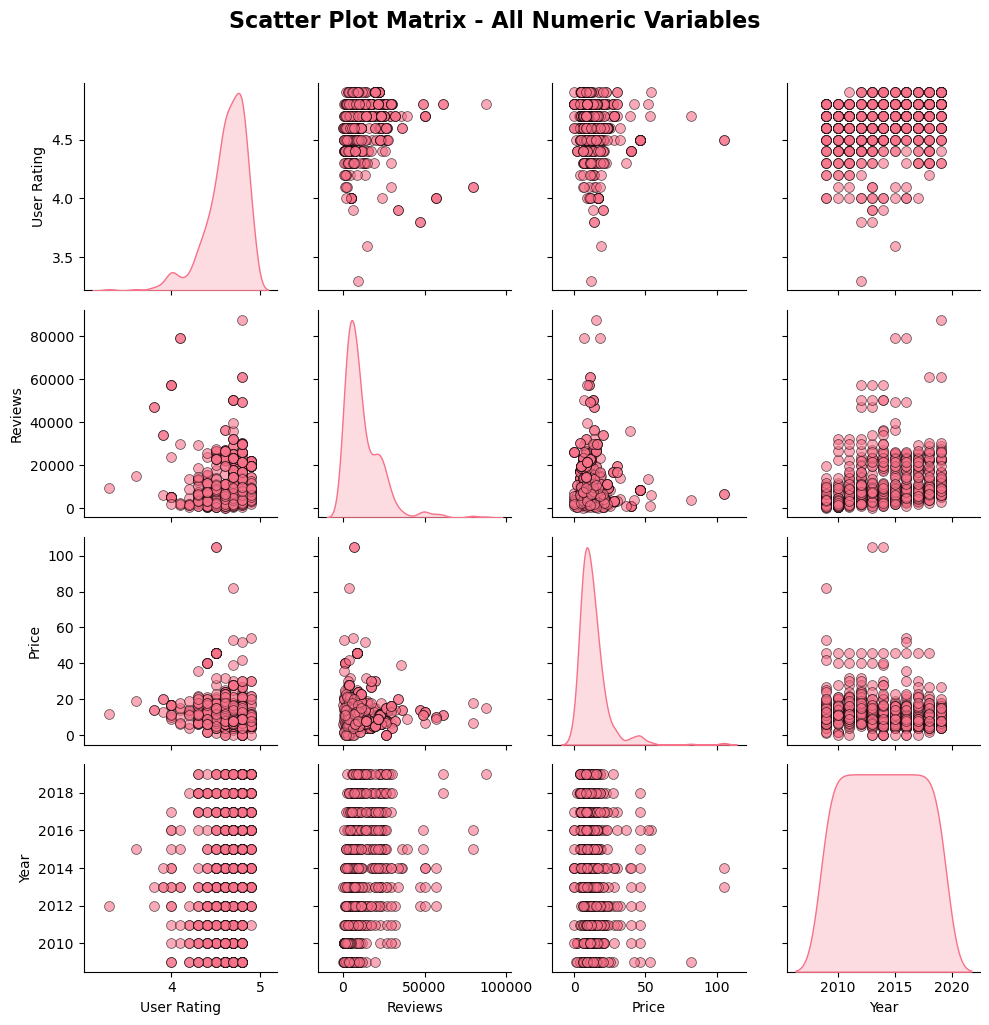

SCATTER PLOT MATRIX ANALYSIS

💡 WHAT THIS SHOWS:
  • Diagonal: Distribution of each variable (density plots)
  • Off-diagonal: Relationships between pairs of variables
  • Look for patterns, clusters, or linear relationships

📊 This comprehensive view helps identify:
  • Which variables are related to each other
  • Whether relationships are linear or non-linear
  • Presence of outliers or unusual patterns


In [22]:
# ============================================================================
# CELL 21: SCATTER PLOT MATRIX (PAIRPLOT)
# ============================================================================

# Create pairplot for all numeric variables
numeric_cols = ['User Rating', 'Reviews', 'Price', 'Year']
pairplot_data = df[numeric_cols]

# Create the pairplot
g = sns.pairplot(pairplot_data, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'black'})
g.fig.suptitle('Scatter Plot Matrix - All Numeric Variables', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("="*80)
print("SCATTER PLOT MATRIX ANALYSIS")
print("="*80)
print("\n💡 WHAT THIS SHOWS:")
print("  • Diagonal: Distribution of each variable (density plots)")
print("  • Off-diagonal: Relationships between pairs of variables")
print("  • Look for patterns, clusters, or linear relationships")
print("\n📊 This comprehensive view helps identify:")
print("  • Which variables are related to each other")
print("  • Whether relationships are linear or non-linear")
print("  • Presence of outliers or unusual patterns")
print("="*80)

In [23]:
# ============================================================================
# CELL 22: YEAR-BY-YEAR AND GENRE-SPECIFIC CORRELATIONS
# ============================================================================

print("="*80)
print("CORRELATION ANALYSIS BY YEAR AND GENRE")
print("="*80)

# Correlation between Price and Rating by Year
print("\n📅 PRICE-RATING CORRELATION BY YEAR:")
print("-"*80)
print(f"{'Year':<8} {'Correlation':<15} {'Sample Size':<15}")
print("-"*80)
for year in sorted(df['Year'].unique()):
    year_data = df[df['Year'] == year]
    corr = year_data['Price'].corr(year_data['User Rating'])
    print(f"{year:<8} {corr:>8.3f}          n={len(year_data)}")

# Correlation between Reviews and Rating by Year
print("\n📅 REVIEWS-RATING CORRELATION BY YEAR:")
print("-"*80)
print(f"{'Year':<8} {'Correlation':<15} {'Sample Size':<15}")
print("-"*80)
for year in sorted(df['Year'].unique()):
    year_data = df[df['Year'] == year]
    corr = year_data['Reviews'].corr(year_data['User Rating'])
    print(f"{year:<8} {corr:>8.3f}          n={len(year_data)}")

# Correlation between Reviews and Rating by Genre
print("\n📚 REVIEWS-RATING CORRELATION BY GENRE:")
print("-"*80)
print(f"{'Genre':<15} {'Correlation':<15} {'Sample Size':<15}")
print("-"*80)
for genre in sorted(df['Genre'].unique()):
    genre_data = df[df['Genre'] == genre]
    corr = genre_data['Reviews'].corr(genre_data['User Rating'])
    print(f"{genre:<15} {corr:>8.3f}          n={len(genre_data)}")

# Correlation between Price and Rating by Genre
print("\n📚 PRICE-RATING CORRELATION BY GENRE:")
print("-"*80)
print(f"{'Genre':<15} {'Correlation':<15} {'Sample Size':<15}")
print("-"*80)
for genre in sorted(df['Genre'].unique()):
    genre_data = df[df['Genre'] == genre]
    corr = genre_data['Price'].corr(genre_data['User Rating'])
    print(f"{genre:<15} {corr:>8.3f}          n={len(genre_data)}")

print("\n💡 INSIGHT:")
print("These breakdowns reveal whether relationships between variables")
print("change over time or differ between Fiction and Non-Fiction.")
print("Varying correlations suggest that bestseller dynamics evolved")
print("or differ by category.")
print("="*80)

CORRELATION ANALYSIS BY YEAR AND GENRE

📅 PRICE-RATING CORRELATION BY YEAR:
--------------------------------------------------------------------------------
Year     Correlation     Sample Size    
--------------------------------------------------------------------------------
2009        0.103          n=50
2010       -0.065          n=50
2011       -0.177          n=50
2012        0.001          n=50
2013       -0.108          n=50
2014       -0.177          n=50
2015       -0.344          n=50
2016       -0.041          n=50
2017       -0.186          n=50
2018       -0.102          n=50
2019       -0.172          n=50

📅 REVIEWS-RATING CORRELATION BY YEAR:
--------------------------------------------------------------------------------
Year     Correlation     Sample Size    
--------------------------------------------------------------------------------
2009        0.030          n=50
2010        0.270          n=50
2011        0.423          n=50
2012       -0.188          n=50

In [ ]:
---
# 🤖 PREDICTIVE MODELING
---

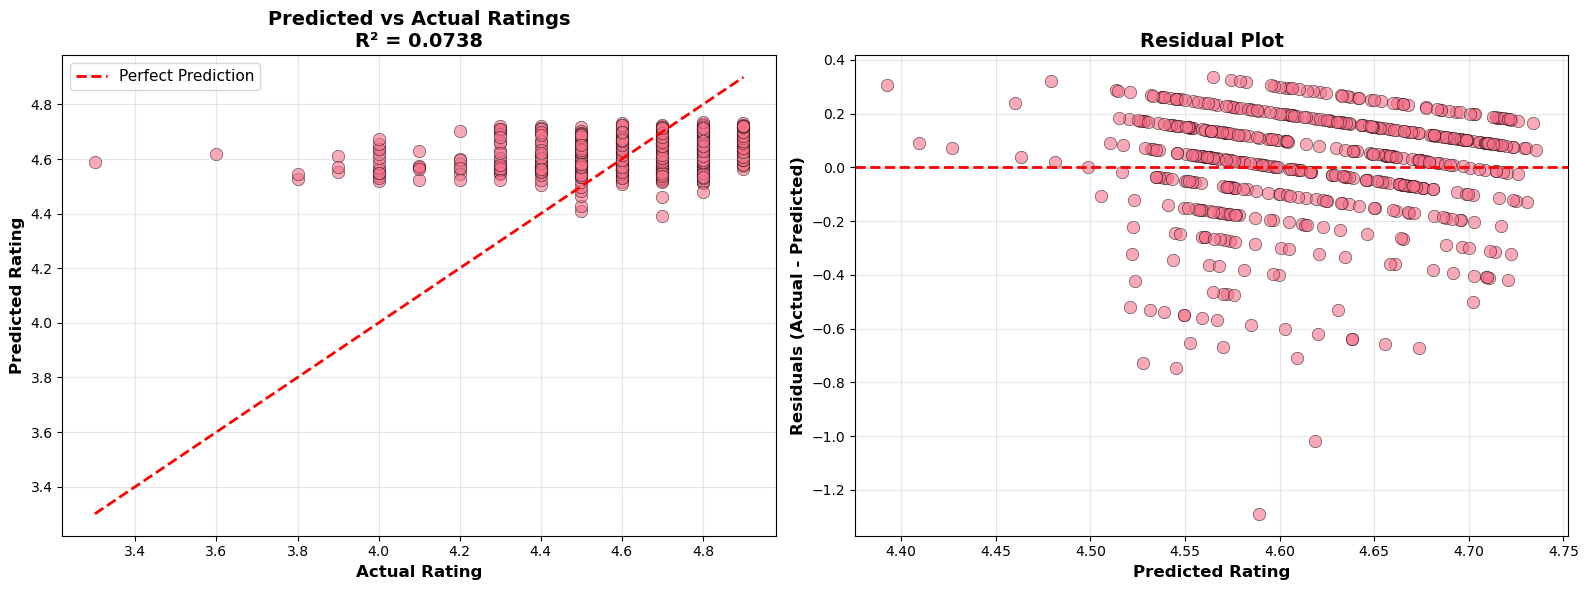

PREDICTIVE MODEL: RATING PREDICTION

🎯 MODEL OBJECTIVE:
Predict User Rating based on Reviews, Price, and Year

📊 MODEL PERFORMANCE:
  R-squared: 0.0738 (explains 7.38% of rating variance)
  RMSE: 0.2182

📈 FEATURE COEFFICIENTS:
  Reviews coefficient: -0.000002
  Price coefficient: -0.002168
  Year coefficient: 0.017715
  Intercept: -31.0132

💡 INTERPRETATION:
  • Each additional 1,000 reviews decreases rating by ~0.0015 points
  • Each $1 increase in price decreases rating by 0.002168 points
  • Each year forward increases rating by 0.0177 points

⚠️ IMPORTANT CONTEXT - WHAT THIS MODEL DOES AND DOESN'T DO

✅ WHAT IT DOES:
  • Predicts ratings AMONG BESTSELLERS ONLY
  • Shows what factors distinguish higher-rated from lower-rated bestsellers
  • Reveals which features matter most for bestseller ratings

❌ WHAT IT DOESN'T DO:
  • Does NOT predict whether a book will become a bestseller
  • Does NOT apply to books outside the Top 50
  • Cannot predict future bestsellers (trained on 2009-2

In [24]:
# ============================================================================
# CELL 23: PREDICT RATINGS
# ============================================================================

# Prepare features and target
X = df[['Reviews', 'Price', 'Year']]
y = df['User Rating']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get predictions
predictions = model.predict(X)

# Calculate performance metrics
r2 = r2_score(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter: Predicted vs Actual
axes[0].scatter(y, predictions, alpha=0.6, s=80, edgecolors='black', linewidth=0.5)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Rating', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Rating', fontsize=12, fontweight='bold')
axes[0].set_title(f'Predicted vs Actual Ratings\nR² = {r2:.4f}', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Residuals plot
residuals = y - predictions
axes[1].scatter(predictions, residuals, alpha=0.6, s=80, edgecolors='black', linewidth=0.5)
axes[1].axhline(0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Rating', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print results
print("="*80)
print("PREDICTIVE MODEL: RATING PREDICTION")
print("="*80)
print("\n🎯 MODEL OBJECTIVE:")
print("Predict User Rating based on Reviews, Price, and Year")
print("\n📊 MODEL PERFORMANCE:")
print(f"  R-squared: {r2:.4f} (explains {r2*100:.2f}% of rating variance)")
print(f"  RMSE: {rmse:.4f}")
print("\n📈 FEATURE COEFFICIENTS:")
print(f"  Reviews coefficient: {model.coef_[0]:.6f}")
print(f"  Price coefficient: {model.coef_[1]:.6f}")
print(f"  Year coefficient: {model.coef_[2]:.6f}")
print(f"  Intercept: {model.intercept_:.4f}")

print("\n💡 INTERPRETATION:")
if model.coef_[0] > 0:
    print(f"  • Each additional 1,000 reviews increases rating by ~{model.coef_[0]*1000:.4f} points")
else:
    print(f"  • Each additional 1,000 reviews decreases rating by ~{abs(model.coef_[0]*1000):.4f} points")
    
if model.coef_[1] > 0:
    print(f"  • Each $1 increase in price increases rating by {model.coef_[1]:.6f} points")
else:
    print(f"  • Each $1 increase in price decreases rating by {abs(model.coef_[1]):.6f} points")
    
if model.coef_[2] > 0:
    print(f"  • Each year forward increases rating by {model.coef_[2]:.4f} points")
else:
    print(f"  • Each year forward decreases rating by {abs(model.coef_[2]):.4f} points")

print("\n" + "="*80)
print("⚠️ IMPORTANT CONTEXT - WHAT THIS MODEL DOES AND DOESN'T DO")
print("="*80)
print("\n✅ WHAT IT DOES:")
print("  • Predicts ratings AMONG BESTSELLERS ONLY")
print("  • Shows what factors distinguish higher-rated from lower-rated bestsellers")
print("  • Reveals which features matter most for bestseller ratings")
print("\n❌ WHAT IT DOESN'T DO:")
print("  • Does NOT predict whether a book will become a bestseller")
print("  • Does NOT apply to books outside the Top 50")
print("  • Cannot predict future bestsellers (trained on 2009-2019 data)")
print("\n🎯 BUSINESS APPLICATION:")
print("  For publishers: Among successful books, what drives even HIGHER ratings?")
print("  For authors: What characteristics of bestsellers lead to better reviews?")
print("  For retailers: How do bestseller features relate to customer satisfaction?")
print("="*80)

In [ ]:
---
# 📋 FINAL SUMMARY & CONCLUSIONS
---

In [25]:
# ============================================================================
# CELL 24: COMPREHENSIVE ANALYSIS SUMMARY
# ============================================================================

print("="*80)
print("🎯 ADVANCED ANALYSIS SUMMARY: 10 YEARS OF TOP BOOK TRENDS")
print("="*80)

print("\n📚 DATASET OVERVIEW")
print("-"*80)
print(f"Total Books Analyzed: {len(df)}")
print(f"Time Period: {df['Year'].min()} - {df['Year'].max()}")
print(f"Selection Criteria: Top 50 Bestsellers per Year")
print(f"Genres: {', '.join(df['Genre'].unique())}")
print(f"Unique Authors: {df['Author'].nunique()}")

print("\n⭐ RATING INSIGHTS")
print("-"*80)
print(f"Average Rating: {df['User Rating'].mean():.2f}")
print(f"Rating Range: {df['User Rating'].min():.2f} - {df['User Rating'].max():.2f}")
print(f"Standard Deviation: {df['User Rating'].std():.2f}")
print(f"Median Rating: {df['User Rating'].median():.2f}")

# Trend analysis
first_year_rating = df[df['Year'] == df['Year'].min()]['User Rating'].mean()
last_year_rating = df[df['Year'] == df['Year'].max()]['User Rating'].mean()
rating_change = last_year_rating - first_year_rating

if abs(rating_change) > 0.05:
    trend = "INCREASED" if rating_change > 0 else "DECREASED"
    print(f"Trend: Ratings {trend} by {abs(rating_change):.2f} points from 2009 to 2019")
else:
    print(f"Trend: Ratings remained STABLE across the decade")

print("\n💰 PRICE INSIGHTS")
print("-"*80)
print(f"Average Price: ${df['Price'].mean():.2f}")
print(f"Median Price: ${df['Price'].median():.2f}")
print(f"Price Range: ${df['Price'].min():.2f} - ${df['Price'].max():.2f}")
print(f"Free Books: {(df['Price'] == 0).sum()} ({(df['Price'] == 0).sum()/len(df)*100:.1f}%)")
print(f"Premium Books (>$20): {(df['Price'] > 20).sum()} ({(df['Price'] > 20).sum()/len(df)*100:.1f}%)")

# Price trend
first_year_price = df[df['Year'] == df['Year'].min()]['Price'].mean()
last_year_price = df[df['Year'] == df['Year'].max()]['Price'].mean()
price_change = last_year_price - first_year_price

if abs(price_change) > 1:
    trend = "INCREASED" if price_change > 0 else "DECREASED"
    print(f"Trend: Prices {trend} by ${abs(price_change):.2f} from 2009 to 2019")
else:
    print(f"Trend: Prices remained STABLE across the decade")

print("\n📊 REVIEW INSIGHTS")
print("-"*80)
print(f"Average Reviews: {df['Reviews'].mean():.0f}")
print(f"Median Reviews: {df['Reviews'].median():.0f}")
print(f"Review Range: {df['Reviews'].min():,} - {df['Reviews'].max():,}")
print(f"Total Reviews (All Books): {df['Reviews'].sum():,}")

# Most reviewed book
most_reviewed = df.loc[df['Reviews'].idxmax()]
print(f"Most Reviewed: '{most_reviewed['Name']}' by {most_reviewed['Author']}")
print(f"               ({most_reviewed['Reviews']:,} reviews, {most_reviewed['User Rating']:.2f} rating)")

print("\n📚 GENRE ANALYSIS (Fiction vs Non-Fiction)")
print("-"*80)
for genre in sorted(df['Genre'].unique()):
    genre_data = df[df['Genre'] == genre]
    pct = len(genre_data)/len(df)*100
    print(f"{genre}:")
    print(f"  Books: {len(genre_data)} ({pct:.1f}%)")
    print(f"  Avg Rating: {genre_data['User Rating'].mean():.2f}")
    print(f"  Avg Reviews: {genre_data['Reviews'].mean():.0f}")
    print(f"  Avg Price: ${genre_data['Price'].mean():.2f}")

print("\n🔗 CORRELATION INSIGHTS")
print("-"*80)
corr_reviews_rating = df['Reviews'].corr(df['User Rating'])
corr_price_rating = df['Price'].corr(df['User Rating'])
corr_year_rating = df['Year'].corr(df['User Rating'])

print(f"Reviews ↔ Rating: {corr_reviews_rating:+.3f}", end="")
if abs(corr_reviews_rating) > 0.3:
    print(" (Moderate relationship)")
else:
    print(" (Weak relationship)")

print(f"Price ↔ Rating: {corr_price_rating:+.3f}", end="")
if abs(corr_price_rating) > 0.1:
    print(" (Some relationship)")
else:
    print(" (Minimal relationship)")

print(f"Year ↔ Rating: {corr_year_rating:+.3f}", end="")
if abs(corr_year_rating) > 0.1:
    print(" (Temporal trend exists)")
else:
    print(" (Stable over time)")

print("\n🎯 TOP PERFORMERS")
print("-"*80)
print("Highest Rated Book:")
top_book = df.loc[df['User Rating'].idxmax()]
print(f"  '{top_book['Name']}' by {top_book['Author']}")
print(f"  Rating: {top_book['User Rating']:.2f} | Year: {int(top_book['Year'])} | Genre: {top_book['Genre']}")

print("\nMost Reviewed Book:")
most_rev = df.loc[df['Reviews'].idxmax()]
print(f"  '{most_rev['Name']}' by {most_rev['Author']}")
print(f"  Reviews: {most_rev['Reviews']:,} | Rating: {most_rev['User Rating']:.2f} | Year: {int(most_rev['Year'])}")

print("\nMost Expensive Book:")
most_exp = df.loc[df['Price'].idxmax()]
print(f"  '{most_exp['Name']}' by {most_exp['Author']}")
print(f"  Price: ${most_exp['Price']:.2f} | Rating: {most_exp['User Rating']:.2f} | Year: {int(most_exp['Year'])}")

print("\n🤖 PREDICTIVE MODEL RESULTS")
print("-"*80)
print(f"Model Performance (R²): {r2:.4f}")
print(f"Variance Explained: {r2*100:.2f}%")
print(f"Key Finding: ", end="")
if r2 < 0.1:
    print("Ratings are difficult to predict from these features alone")
elif r2 < 0.3:
    print("These features explain some rating variance, but other factors matter more")
else:
    print("These features are meaningful predictors of bestseller ratings")

print("\n💡 KEY TAKEAWAYS")
print("-"*80)
print("1. RATING STABILITY: Bestseller ratings remain consistently high (avg {:.2f})".format(df['User Rating'].mean()))
print("2. PRICE-QUALITY: Price shows {} correlation with ratings among bestsellers".format(
    "weak" if abs(corr_price_rating) < 0.3 else "moderate"))
print("3. ENGAGEMENT: Review volume {} with higher ratings".format(
    "correlates positively" if corr_reviews_rating > 0.1 else "shows weak correlation"))
print("4. GENRE BALANCE: Both Fiction and Non-Fiction achieve bestseller status")
print("5. TEMPORAL TRENDS: Bestseller characteristics {} over the decade".format(
    "evolved" if abs(corr_year_rating) > 0.1 else "remained stable"))

print("\n⚠️ IMPORTANT LIMITATIONS")
print("-"*80)
print("• Sample Bias: Only bestsellers analyzed, not representative of all books")
print("• Survivorship Bias: These books already 'succeeded' - can't predict success")
print("• Platform Specific: Amazon data only, may differ on other platforms")
print("• Time-Limited: 2009-2019 data, market has likely evolved since")
print("• Genre Simplicity: Only Fiction/Non-Fiction, missing sub-genre nuances")

print("\n🎓 BUSINESS RECOMMENDATIONS")
print("-"*80)
print("For Publishers:")
print("  • Both genres can achieve bestseller status - diversify portfolio")
print("  • Price optimization matters less than quality for top books")
print("  • Focus on factors that drive sustained reader engagement")
print("\nFor Authors:")
print("  • Consistent quality matters more than pricing strategy")
print("  • High review volume often accompanies high ratings")
print("  • Both Fiction and Non-Fiction have paths to success")
print("\nFor Retailers:")
print("  • Bestsellers maintain consistently high ratings")
print("  • Review volume is a key engagement metric")
print("  • Price diversity exists even among top performers")

print("\n🔬 FUTURE RESEARCH OPPORTUNITIES")
print("-"*80)
print("• Compare bestsellers vs average books to understand success factors")
print("• Analyze post-2020 trends (pandemic impact, digital shift)")
print("• Investigate sub-genre patterns within Fiction/Non-Fiction")
print("• Examine author career trajectories (repeat bestsellers)")
print("• Sentiment analysis of review text for deeper insights")
print("• Seasonal patterns in bestseller characteristics")

print("\n" + "="*80)
print("📊 TECHNICAL SKILLS DEMONSTRATED")
print("="*80)
print("✅ Data Loading & Cleaning (Excel files)")
print("✅ Exploratory Data Analysis (EDA)")
print("✅ Statistical Analysis (correlations, trends)")
print("✅ Data Visualization (matplotlib, seaborn)")
print("✅ Time Series Analysis (rolling averages, YoY changes)")
print("✅ Comparative Analysis (genres, price categories, years)")
print("✅ Predictive Modeling (linear regression)")
print("✅ Critical Thinking (understanding sample limitations)")
print("✅ Business Communication (translating findings to recommendations)")

print("\n" + "="*80)
print("Analysis completed: " + str(pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')))
print("Dataset: Amazon Top 50 Bestsellers (2009-2019)")
print("Tools: Python, Pandas, Matplotlib, Seaborn, Scikit-learn, SciPy")
print("="*80)

🎯 ADVANCED ANALYSIS SUMMARY: 10 YEARS OF TOP BOOK TRENDS

📚 DATASET OVERVIEW
--------------------------------------------------------------------------------
Total Books Analyzed: 550
Time Period: 2009 - 2019
Selection Criteria: Top 50 Bestsellers per Year
Genres: Non Fiction, Fiction
Unique Authors: 248

⭐ RATING INSIGHTS
--------------------------------------------------------------------------------
Average Rating: 4.62
Rating Range: 3.30 - 4.90
Standard Deviation: 0.23
Median Rating: 4.70
Trend: Ratings INCREASED by 0.16 points from 2009 to 2019

💰 PRICE INSIGHTS
--------------------------------------------------------------------------------
Average Price: $13.10
Median Price: $11.00
Price Range: $0.00 - $105.00
Free Books: 12 (2.2%)
Premium Books (>$20): 68 (12.4%)
Trend: Prices DECREASED by $5.32 from 2009 to 2019

📊 REVIEW INSIGHTS
--------------------------------------------------------------------------------
Average Reviews: 11953
Median Reviews: 8580
Review Range: 37 - 87,8